## IMPORT NECESSARY LIBRARIES AND LOAD DATASET

In [ ]:
!pip install datasist

In [ ]:
import datasist as ds

In [ ]:
import pandas as pd
import scipy.stats as stats
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DIssertation/Airline_customer_satisfaction.csv")

In [ ]:
df.head()

satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               0              2  ...               2                       3   
1               0              3  ...               2                       3   
2               0              3  ...               2                       2   
3               0              3  ...               3                       1   
4               0              3  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 22 columns]

In [ ]:
df.T

0                1       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             65               47   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco         Business   
Flight Distance                                265             2464   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                0   
Food and drink                                   0                0   
Gate location                                    2                3   
Inflight wifi service                            2                0   
Inflight entertainment                           4                2   
Online support                                   2                2   
Ease of Online booking                           3                3   
On-board service                                 3                4   
Leg room service                                 0                4   
Baggage handling                                 3                4   
Checkin service                                  5                2   
Cleanliness                                      3                3   
Online boarding                                  2                2   
Departure Delay in Minutes                       0              310   
Arrival Delay in Minutes                       0.0            305.0   

                                            2                3       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             15               60   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco              Eco   
Flight Distance                               2138              623   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                0   
Food and drink                                   0                0   
Gate location                                    3                3   
Inflight wifi service                            2                3   
Inflight entertainment                           0                4   
Online support                                   2                3   
Ease of Online booking                           2                1   
On-board service                                 3                1   
Leg room service                                 3                0   
Baggage handling                                 4                1   
Checkin service                                  4                4   
Cleanliness                                      4                1   
Online boarding                                  2                3   
Departure Delay in Minutes                       0                0   
Arrival Delay in Minutes                       0.0              0.0   

                                            4                5       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             70               30   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco              Eco   
Flight Distance                                354             1894   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                0   
Food and drink                                   0                0   
Gate location                                    3                

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [ ]:
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [ ]:
df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

## Exploratory data analysis/visualization


In [ ]:
df.describe().T

count         mean          std   min  \
Age                                129880.0    39.427957    15.119360   7.0   
Flight Distance                    129880.0  1981.409055  1027.115606  50.0   
Seat comfort                       129880.0     2.838597     1.392983   0.0   
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0   
Food and drink                     129880.0     2.851994     1.443729   0.0   
Gate location                      129880.0     2.990422     1.305970   0.0   
Inflight wifi service              129880.0     3.249130     1.318818   0.0   
Inflight entertainment             129880.0     3.383477     1.346059   0.0   
Online support                     129880.0     3.519703     1.306511   0.0   
Ease of Online booking             129880.0     3.472105     1.305560   0.0   
On-board service                   129880.0     3.465075     1.270836   0.0   
Leg room service                   129880.0     3.485902     1.292226   0.0   
Baggage handling                   129880.0     3.695673     1.156483   1.0   
Checkin service                    129880.0     3.340807     1.260582   0.0   
Cleanliness                        129880.0     3.705759     1.151774   0.0   
Online boarding                    129880.0     3.352587     1.298715   0.0   
Departure Delay in Minutes         129880.0    14.713713    38.071126   0.0   
Arrival Delay in Minutes           129487.0    15.091129    38.465650   0.0   

                                      25%     50%     75%     max  
Age                                  27.0    40.0    51.0    85.0  
Flight Distance                    1359.0  1925.0  2544.0  6951.0  
Seat comfort                          2.0     3.0     4.0     5.0  
Departure/Arrival time convenient     2.0     3.0     4.0     5.0  
Food and drink                        2.0     3.0     4.0     5.0  
Gate location                         2.0     3.0     4.0     5.0  
Inflight wifi service                 2.0     3.0     4.0     5.0  
Inflight entertainment                2.0     4.0     4.0     5.0  
Online support                        3.0     4.0     5.0     5.0  
Ease of Online booking                2.0     4.0     5.0     5.0  
On-board service                      3.0     4.0     4.0     5.0  
Leg room service                      2.0     4.0     5.0     5.0  
Baggage handling                      3.0     4.0     5.0     5.0  
Checkin service                       3.0     3.0     4.0     5.0  
Cleanliness                           3.0     4.0     5.0     5.0  
Online boarding                       2.0     4.0     4.0     5.0  
Departure Delay in Minutes            0.0     0.0    12.0  1592.0  
Arrival Delay in Minutes              0.0     0.0    13.0  1584.0

In [ ]:
ds.structdata.display_missing(df)

features  missing_counts  missing_percent
0                        satisfaction               0              0.0
1                       Customer Type               0              0.0
2                                 Age               0              0.0
3                      Type of Travel               0              0.0
4                               Class               0              0.0
5                     Flight Distance               0              0.0
6                        Seat comfort               0              0.0
7   Departure/Arrival time convenient               0              0.0
8                      Food and drink               0              0.0
9                       Gate location               0              0.0
10              Inflight wifi service               0              0.0
11             Inflight entertainment               0              0.0
12                     Online support               0              0.0
13             Ease of Online booking               0              0.0
14                   On-board service               0              0.0
15                   Leg room service               0              0.0
16                   Baggage handling               0              0.0
17                    Checkin service               0              0.0
18                        Cleanliness               0              0.0
19                    Online boarding               0              0.0
20         Departure Delay in Minutes               0              0.0
21           Arrival Delay in Minutes             393              0.3

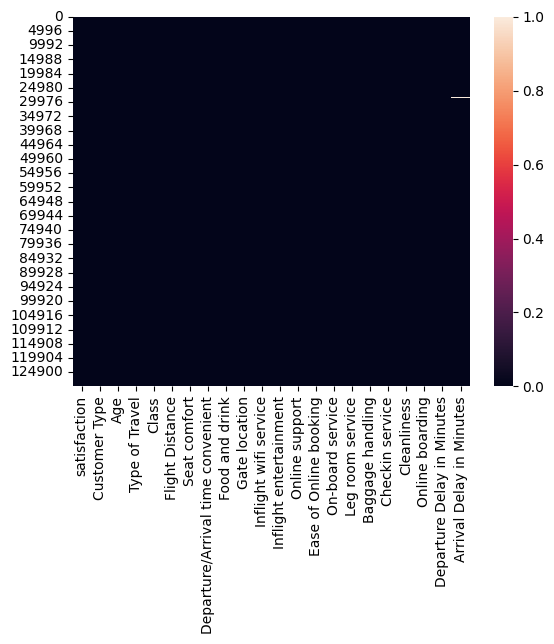

In [ ]:
ds.visualizations.plot_missing(df)

In [ ]:
df['Arrival Delay in Minutes'].fillna((df['Arrival Delay in Minutes'].median()), inplace=True)

In [ ]:
df.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
cat_feats = ds.structdata.get_cat_feats(df)
cat_feats

['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
num_feats = ds.structdata.get_num_feats(df)
num_feats

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [ ]:
ds.structdata.get_unique_counts(df)

In [ ]:
from collections import Counter
Counter(df['satisfaction'])

Counter({'satisfied': 71087, 'dissatisfied': 58793})

In [ ]:
Counter(df['Customer Type'])

Counter({'Loyal Customer': 106100, 'disloyal Customer': 23780})

In [ ]:
Counter(df['Type of Travel'])

Counter({'Personal Travel': 40187, 'Business travel': 89693})

In [ ]:
Counter(df['Class'])

Counter({'Eco': 58309, 'Business': 62160, 'Eco Plus': 9411})

In [ ]:
ds.visualizations.class_count(df)

Class Count for satisfaction


count
satisfaction       
satisfied     71087
dissatisfied  58793

Class Count for Customer Type


count
Customer Type            
Loyal Customer     106100
disloyal Customer   23780

Class Count for Type of Travel


count
Type of Travel        
Business travel  89693
Personal Travel  40187

Class Count for Class


count
Class          
Business  62160
Eco       58309
Eco Plus   9411

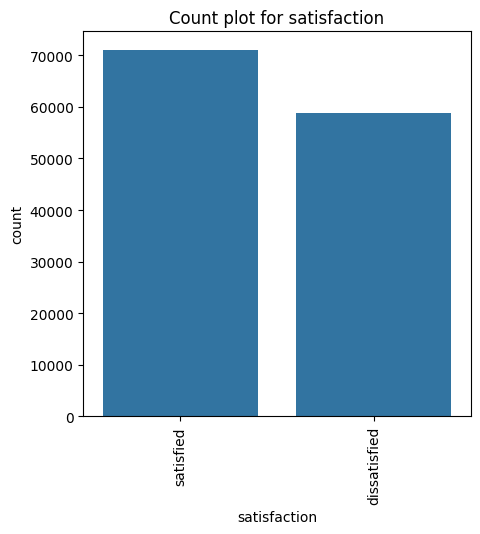

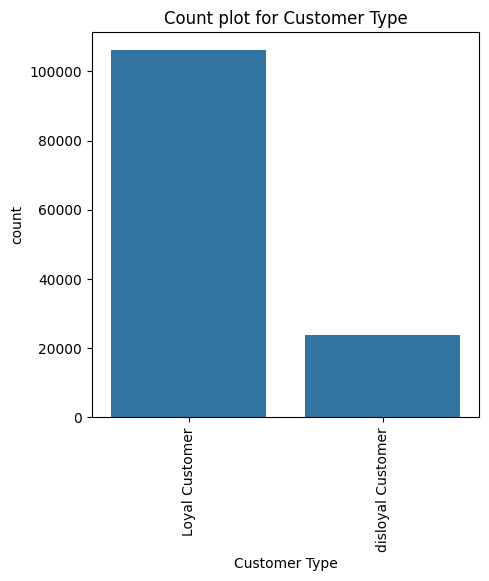

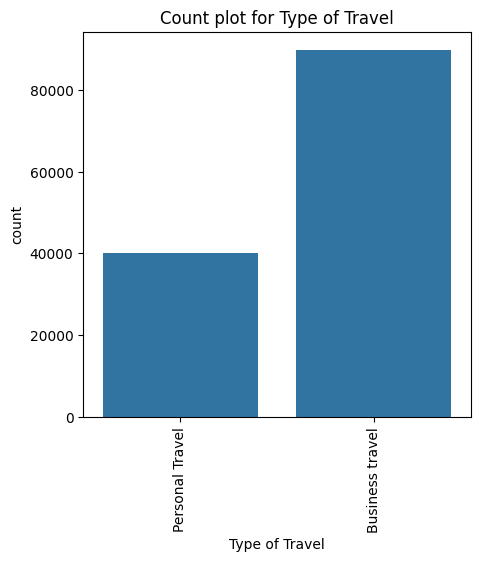

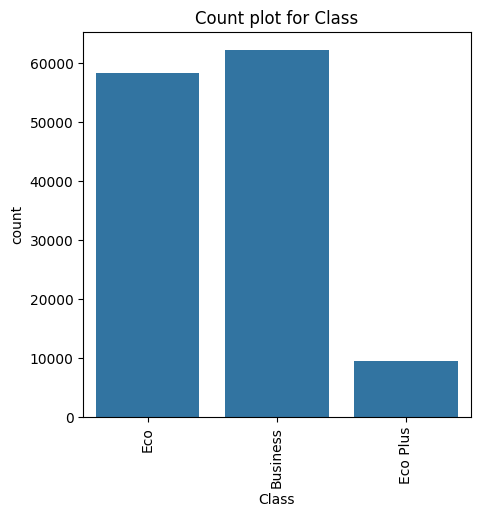

In [ ]:
ds.visualizations.countplot(df)

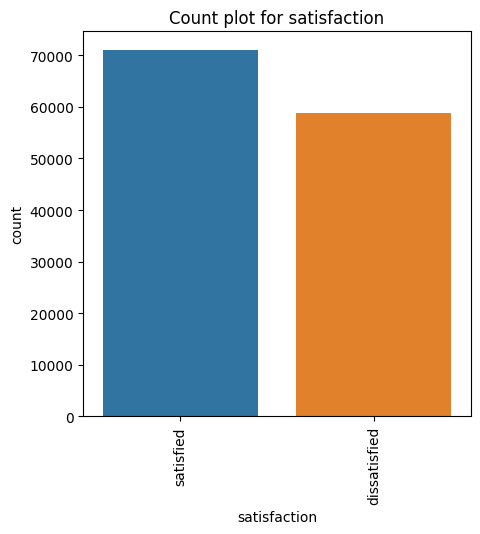

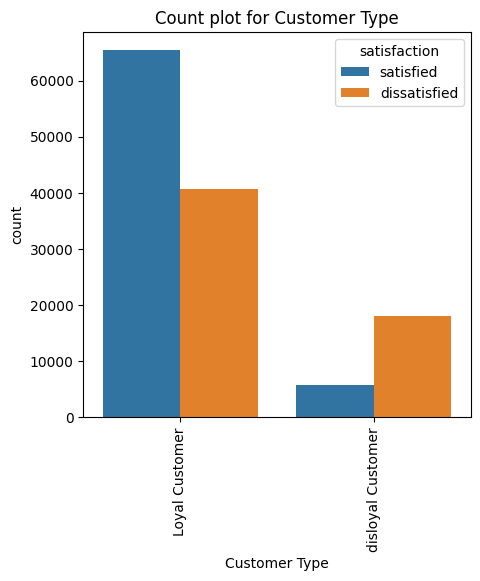

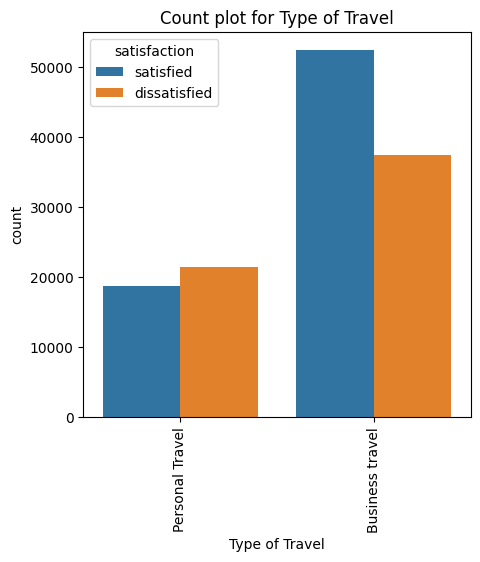

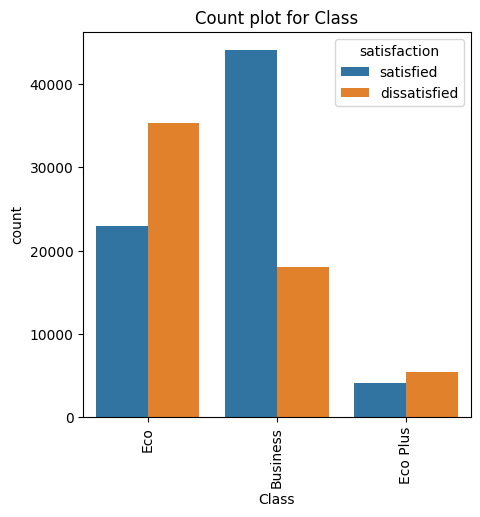

In [ ]:
ds.visualizations.countplot(df, separate_by='satisfaction')

In [ ]:
# Functions for plot customizations
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

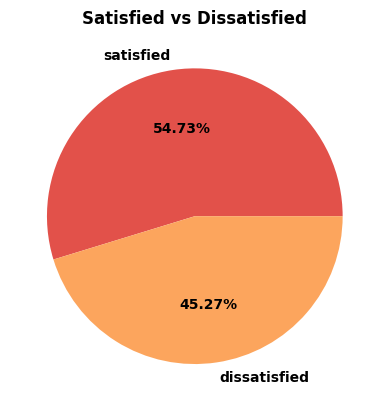

In [ ]:
plt.title("Satisfied vs Dissatisfied", fontsize = 12, weight='bold')
plt.pie(df['satisfaction'].value_counts(),labels=df['satisfaction'].value_counts().index,radius=1, autopct='%.2f%%',textprops={'fontsize': 10, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.show()

The number of satisfied customers exceeds the number of dissatisfied customers, indicating a prevailing trend towards positive experiences with the service or product.

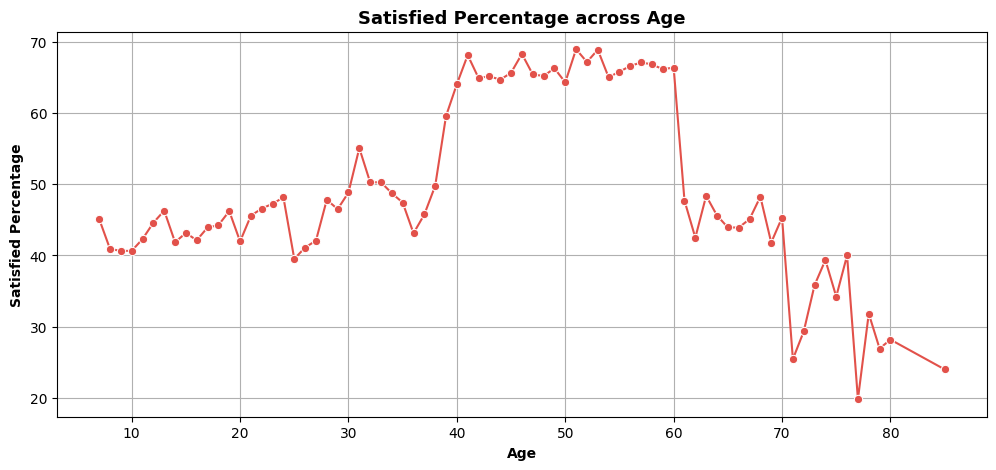

In [ ]:
set_size_style(12,5)
age_groups = df.groupby('Age')['satisfaction'].value_counts(normalize=True).unstack()
satisfied_percentage = age_groups['satisfied'] * 100
ax =sns.lineplot(x=satisfied_percentage.index, y=satisfied_percentage.values, marker='o', color= sns.color_palette('Spectral')[0])
customize_plot(ax, 'Satisfied Percentage across Age', 'Age', 'Satisfied Percentage',13,10)
plt.grid(True)
plt.show()

Individuals in their 40s and 50s exhibit satisfaction with airline services.
Conversely, older individuals above the age of 70 express significantly higher levels of dissatisfaction with the services provided

In [ ]:
age_groups

satisfaction  dissatisfied  satisfied
Age                                  
7                 0.548905   0.451095
8                 0.590966   0.409034
9                 0.593714   0.406286
10                0.593674   0.406326
11                0.577061   0.422939
..                     ...        ...
77                0.801887   0.198113
78                0.681818   0.318182
79                0.730769   0.269231
80                0.718182   0.281818
85                0.760000   0.240000

[75 rows x 2 columns]

In [ ]:
numerical=df.describe()
numerical.columns
numerical=df[numerical.columns]
numerical.median()

Age                                    40.0
Flight Distance                      1925.0
Seat comfort                            3.0
Departure/Arrival time convenient       3.0
Food and drink                          3.0
Gate location                           3.0
Inflight wifi service                   3.0
Inflight entertainment                  4.0
Online support                          4.0
Ease of Online booking                  4.0
On-board service                        4.0
Leg room service                        4.0
Baggage handling                        4.0
Checkin service                         3.0
Cleanliness                             4.0
Online boarding                         4.0
Departure Delay in Minutes              0.0
Arrival Delay in Minutes                0.0
dtype: float64

In [ ]:
numerical.head()

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  \
0                       4               2                       3   
1                       2               2                       3   
2                       0               2                       2   
3                       4               3                       1   
4                       3               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("dark")

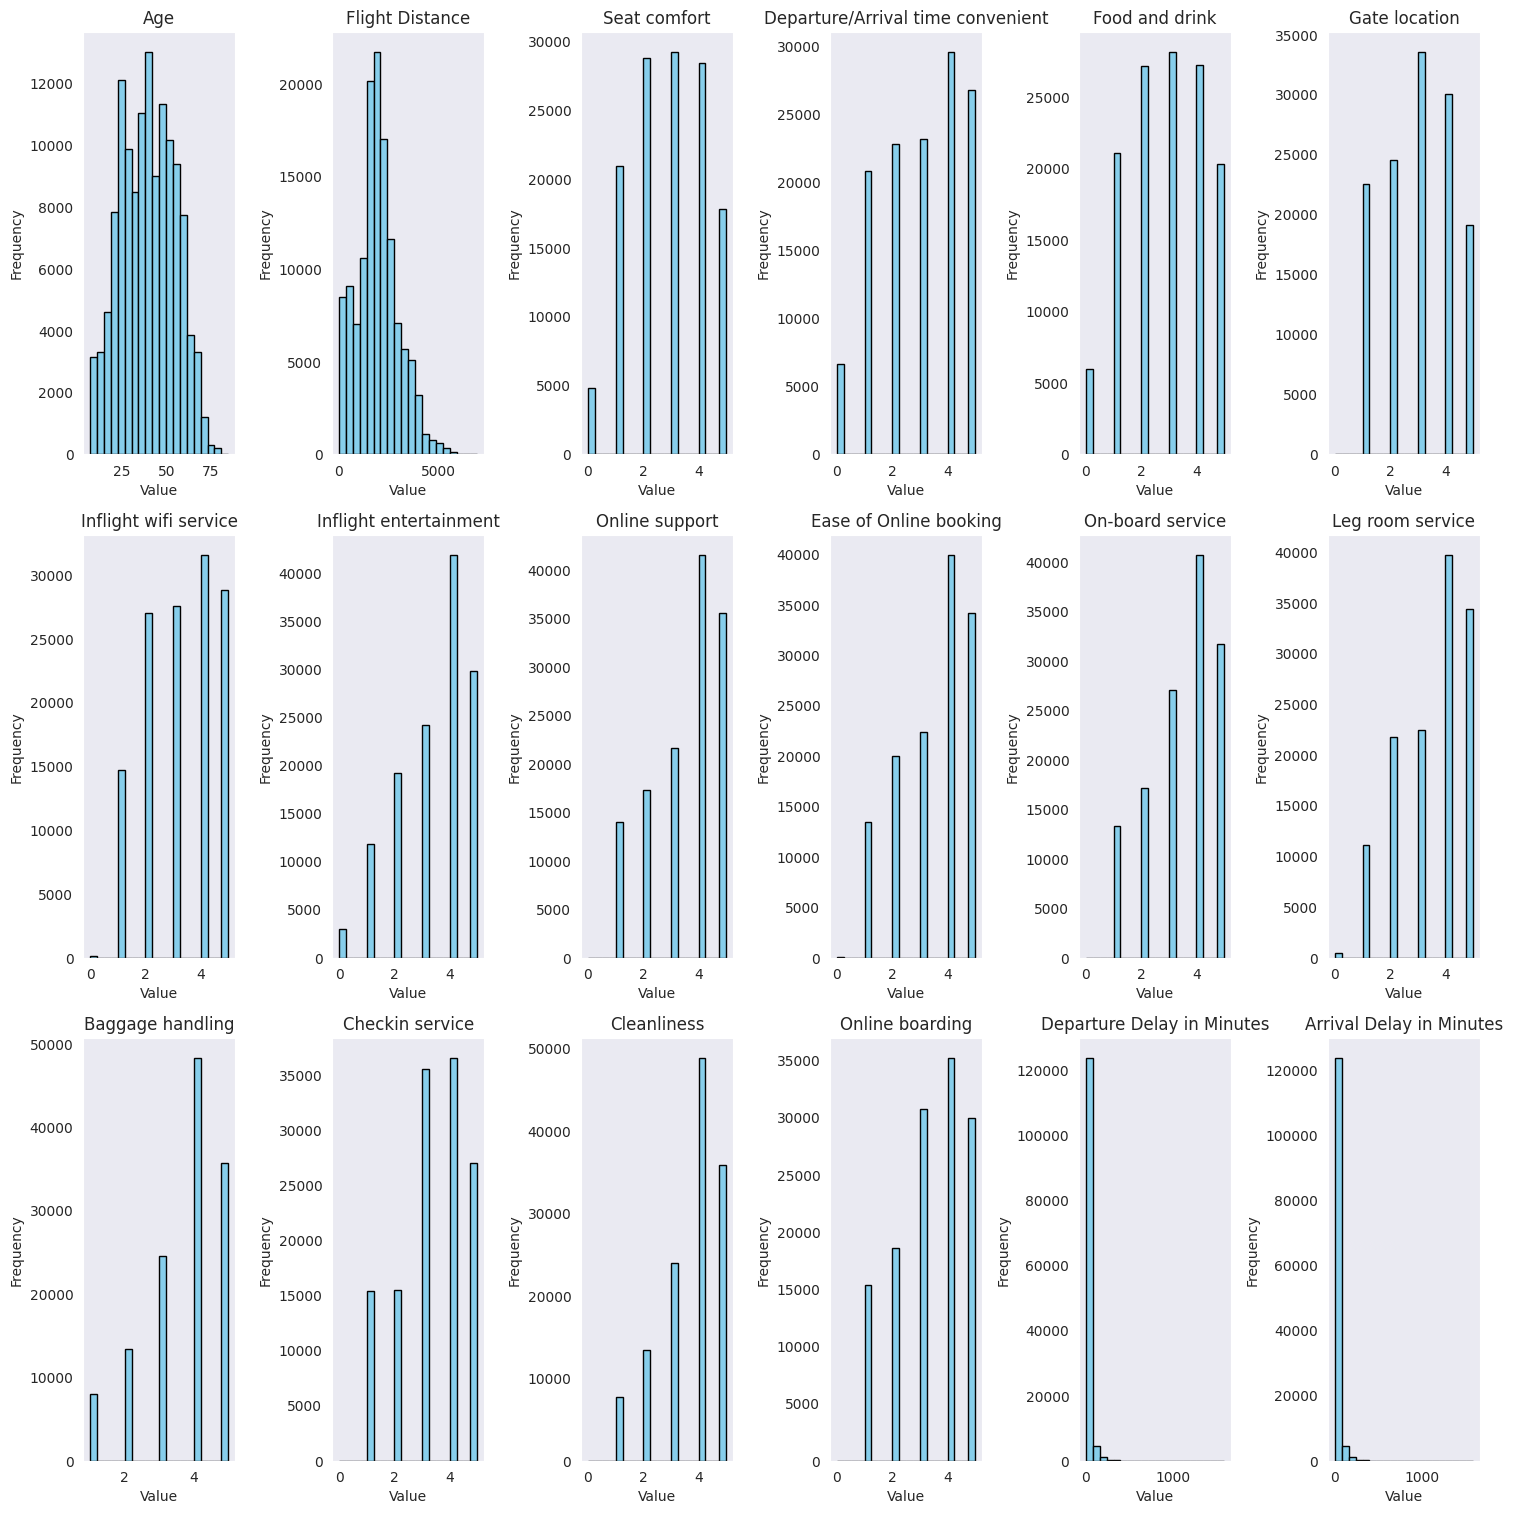

In [ ]:
# Set up the figure and axes
columns = numerical.columns
num_rows = len(columns) // 2 + len(columns) % 2
num_cols = 6

# Set up the figure and axis
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(numerical[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Key insights:

* The majority of individuals fall within the age range of 20 to 60 years. Target Population consists mainly of middle aged indivduals around their
30s and 40s.
* Flight Distance is skewed to the right indicating short travels are carried out by this airline.
* Majority of KPI's are skewed to the left, indicating strong customer satisfaction
* Delays are skewed towards left. Suggesting flights are mostly delay by an hour or two

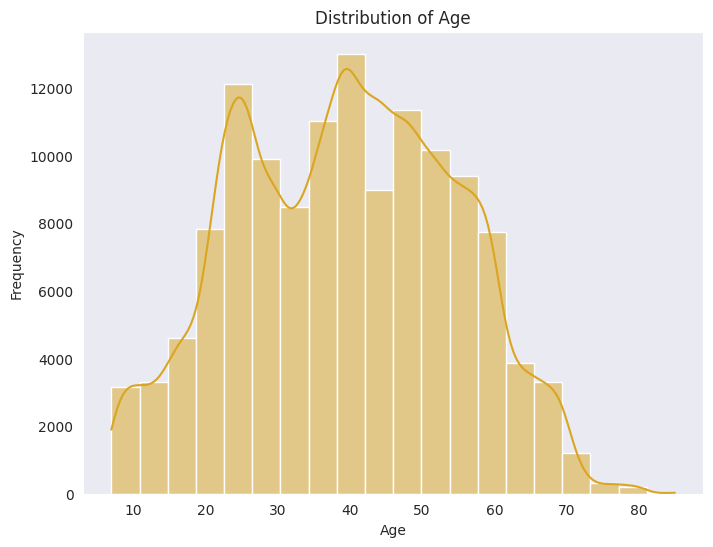

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='goldenrod')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

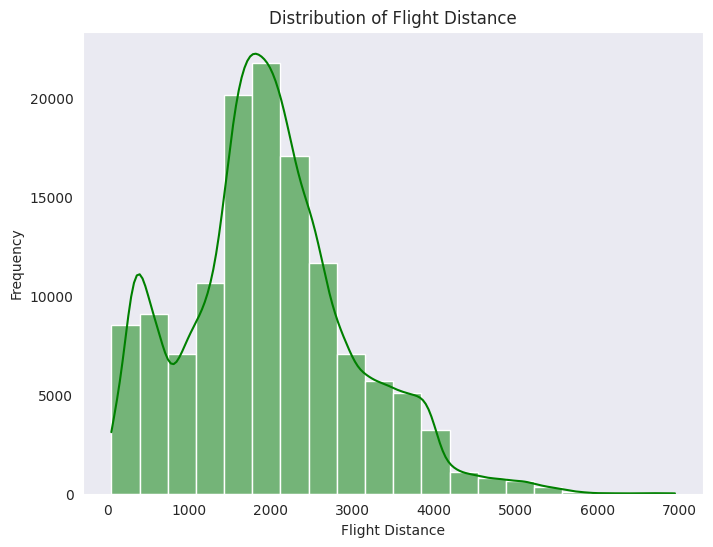

In [ ]:
# Distribution of Flight Distance
plt.figure(figsize=(8, 6))
sns.histplot(df['Flight Distance'], bins=20, kde=True, color='green')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

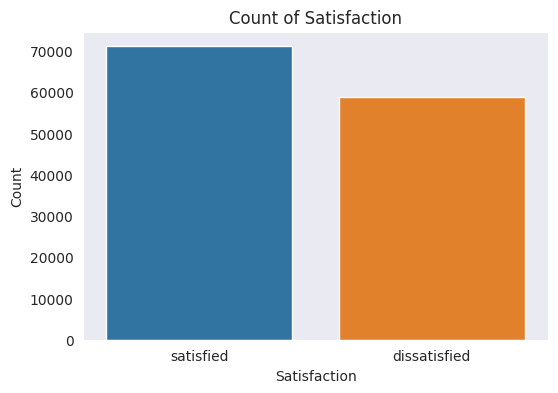

In [ ]:
# Count plot of Satisfaction
plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', data=df, hue='satisfaction')
plt.title('Count of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

<ipython-input-38-d7a60807d3c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer Type', palette='cubehelix')


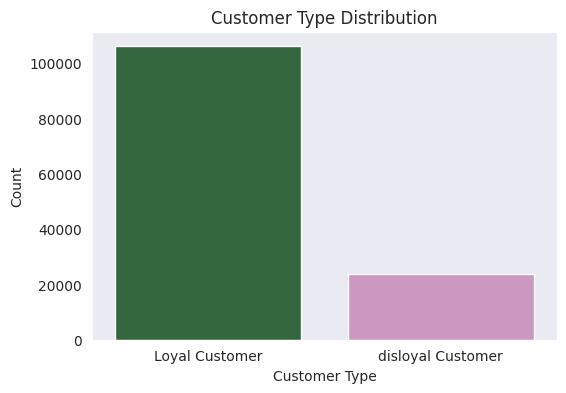

In [ ]:
# Customer Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Customer Type', palette='cubehelix')
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

<ipython-input-39-ea82e4d04518>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type of Travel', palette='viridis')


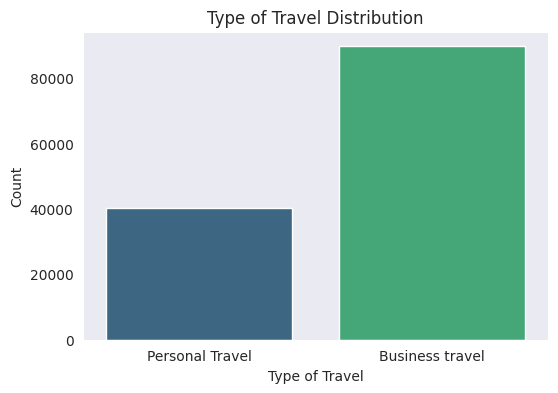

In [ ]:
#Type of Travel Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type of Travel', palette='viridis')
plt.title('Type of Travel Distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()

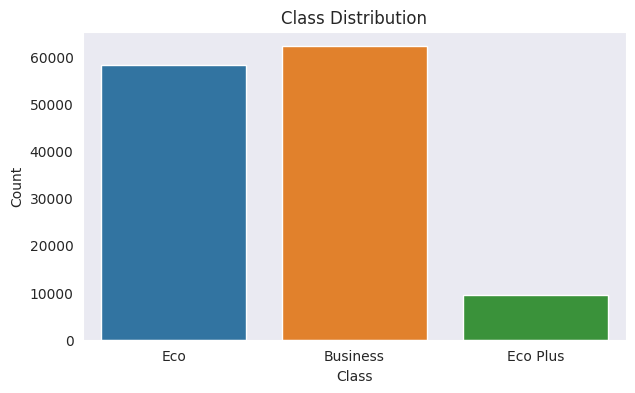

In [ ]:
# Visualization 5: Class Distribution
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Class', hue = 'Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#pip install pandasai

In [ ]:
#from pandasai import Agent

In [ ]:
# os.environ['PANDASAI_API_KEY'] =
# "$2a$10$5qlaIiWsL6rX2suAxgn18.Fos47u/MoTFLRbMbK.e9jB/R3/hteAi"
#agent = Agent(df)

In [ ]:
#agent.chat('what are the customer type compared with total satisfaction, do not visualize')

satisfaction
Customer Type     satisfaction              
Loyal Customer    satisfied            65387
                  dissatisfied         40713
disloyal Customer dissatisfied         18080
                  satisfied             5700

from matplotlib import pyplot as plt
_df_0['satisfaction'].plot(kind='hist', bins=20, title='satisfaction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['satisfaction'].plot(kind='line', figsize=(8, 4), title='satisfaction')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#agent.chat("what is the oldest age, what is their satisfaction")

'The oldest age is 85 and their satisfaction is dissatisfied.'

In [ ]:
#agent.chat("how many gave highest rate for inflight entertainment")

29831

In [ ]:
# prompt: what is the youngest and oldest age, their customer type and satisfaction

#agent.chat("what is the youngest and oldest age, their customer type and satisfaction")


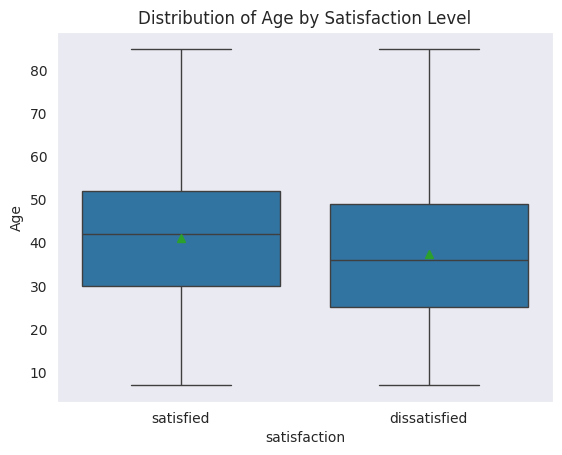

In [ ]:
# Distribution of Age by Satisfaction Level
sns.boxplot(
    x = "satisfaction",
    y = "Age",
    showmeans=True,
    data=df
)
plt.title("Distribution of Age by Satisfaction Level")
plt.show()


In [ ]:
# Create a binary delay feature
df['Delayed'] = np.where((df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) > 0, 'Delayed', 'No Delay')


In [ ]:
df.head()

satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Ease of Online booking  \
0               0              2  ...                       3   
1               0              3  ...                       3   
2               0              3  ...                       2   
3               0              3  ...                       1   
4               0              3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes   Delayed  
0                       0.0  No Delay  
1                     305.0   Delayed  
2                       0.0  No Delay  
3                       0.0  No Delay  
4                       0.0  No Delay  

[5 rows x 23 columns]

In [ ]:
# Count satisfaction levels by delay status
delay_satisfaction_counts = df.groupby(['Delayed', 'satisfaction']).size().unstack()
print("Satisfaction Level by Delay Status")
print(delay_satisfaction_counts)

Satisfaction Level by Delay Status
satisfaction  dissatisfied  satisfied
Delayed                              
Delayed              34019      36363
No Delay             24774      34724


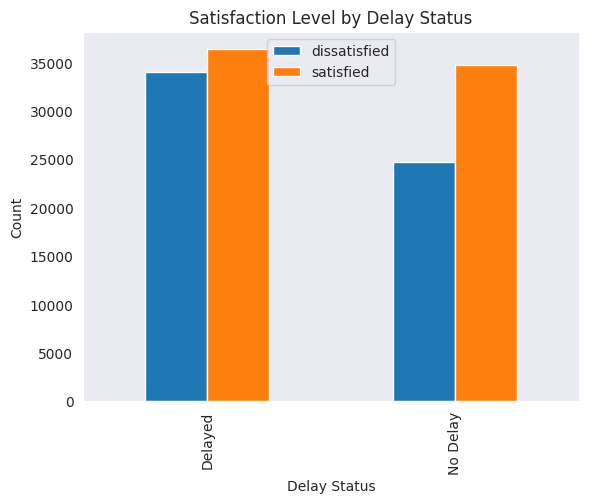

In [ ]:
# prompt: make a plot of delay_satisfaction_counts

import matplotlib.pyplot as plt
delay_satisfaction_counts.plot(kind='bar')
plt.title('Satisfaction Level by Delay Status')
plt.xlabel('Delay Status')
plt.ylabel('Count')
plt.legend(loc='upper center')
plt.show()


In [ ]:
# Identify features with highest and lowest mean ratings
service_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online support', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']
average_ratings = df[service_features].mean()  # Calculate average ratings for each feature
highest_rated = average_ratings.idxmax()
lowest_rated = average_ratings.idxmin()

In [ ]:
print("Feature with Highest Average Rating:", highest_rated)
print("Feature with Lowest Average Rating:", lowest_rated)

Feature with Highest Average Rating: Cleanliness
Feature with Lowest Average Rating: Seat comfort


In [ ]:
# Calculate correlations between service features
correlation_matrix = df[service_features].corr()

In [ ]:
correlation_matrix.round(2)

Inflight wifi service  \
Inflight wifi service                               1.00   
Departure/Arrival time convenient                  -0.00   
Ease of Online booking                              0.60   
Gate location                                      -0.00   
Food and drink                                      0.03   
Online support                                      0.56   
Online boarding                                     0.63   
Seat comfort                                        0.13   
Inflight entertainment                              0.25   
On-board service                                    0.06   
Leg room service                                    0.03   
Baggage handling                                    0.04   
Checkin service                                     0.09   
Cleanliness                                         0.04   

                                   Departure/Arrival time convenient  \
Inflight wifi service                                          -0.00   
Departure/Arrival time convenient                               1.00   
Ease of Online booking                                          0.00   
Gate location                                                   0.54   
Food and drink                                                  0.53   
Online support                                                 -0.00   
Online boarding                                                -0.00   
Seat comfort                                                    0.43   
Inflight entertainment                                          0.08   
On-board service                                                0.06   
Leg room service                                                0.03   
Baggage handling                                                0.07   
Checkin service                                                 0.06   
Cleanliness                                                     0.07   

                                   Ease of Online booking  Gate location  \
Inflight wifi service                                0.60          -0.00   
Departure/Arrival time convenient                    0.00           0.54   
Ease of Online booking                               1.00           0.00   
Gate location                                        0.00           1.00   
Food and drink                                       0.04           0.52   
Online support                                       0.62           0.00   
Online boarding                                      0.68          -0.00   
Seat comfort                                         0.21           0.41   
Inflight entertainment                               0.32          -0.00   
On-board service                                     0.44          -0.03   
Leg room service                                     0.36          -0.01   
Baggage handling                                     0.40          -0.00   
Checkin service                                      0.14          -0.03   
Cleanliness                                          0.42          -0.00   

                                   Food and drink  Online support  \
Inflight wifi service                        0.03            0.56   
Departure/Arrival time convenient            0.53           -0.00   
Ease of Online booking                       0.04            0.62   
Gate location                                0.52            0.00   
Food and drink                               1.00            0.03   
Online support                               0.03            1.00   
Online boarding                              0.01            0.67   
Seat comfort                                 0.72            0.12   
Inflight entertainment                       0.37            0.44   
On-board service                             0.04            0.16   
Leg room service                             0.07            0.14   
Baggage handling                             0.04            0.10   
Checkin service

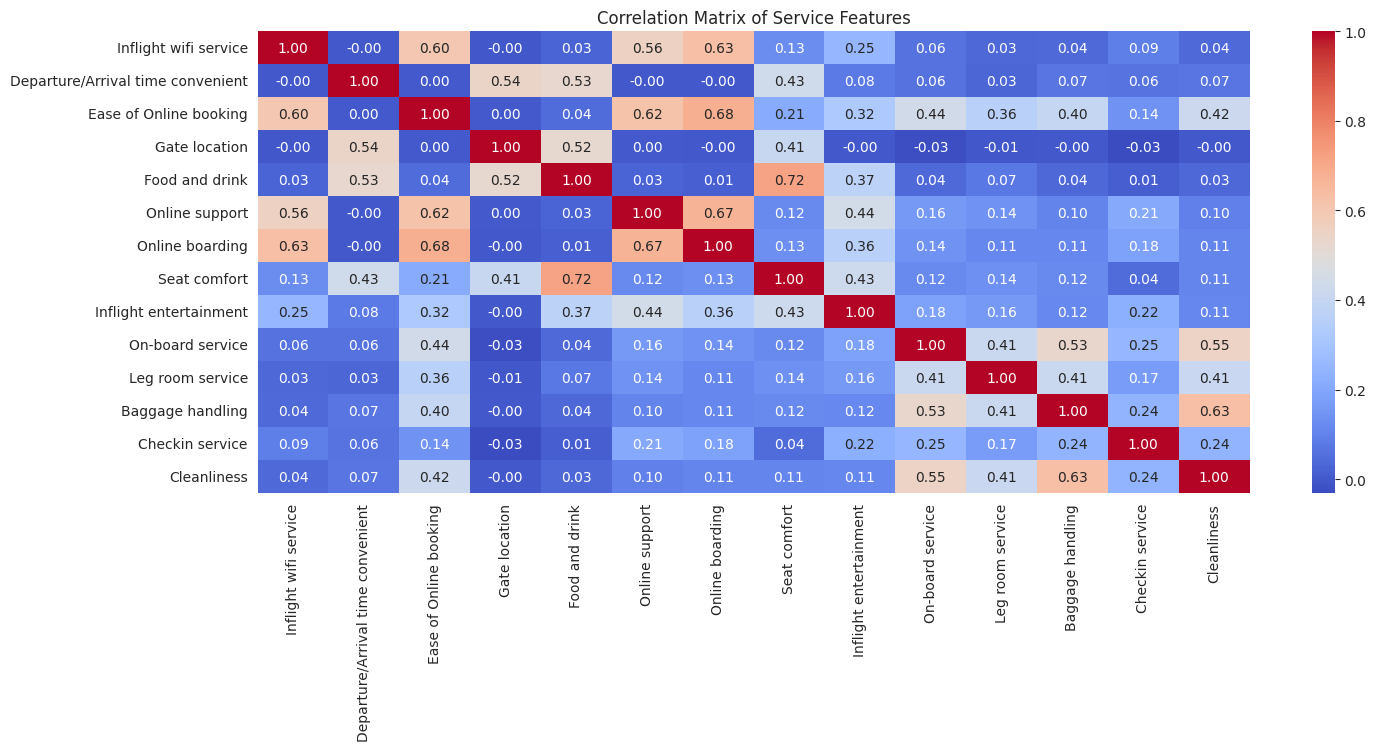

In [ ]:
# prompt: suggest a plot for correlation-matrix

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Service Features")
plt.show()


In [ ]:
# Print correlations with absolute value above a threshold (e.g., 0.5)
high_correlations = correlation_matrix.abs() > 0.5
high_correlations = high_correlations.stack().loc[lambda x: x].reset_index()  # Convert to DataFrame
high_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation'] # Rename
print("Correlations between Service Features (absolute value > 0.5):")
high_correlations

Correlations between Service Features (absolute value > 0.5):


Feature 1                          Feature 2  \
0               Inflight wifi service              Inflight wifi service   
1               Inflight wifi service             Ease of Online booking   
2               Inflight wifi service                     Online support   
3               Inflight wifi service                    Online boarding   
4   Departure/Arrival time convenient  Departure/Arrival time convenient   
5   Departure/Arrival time convenient                      Gate location   
6   Departure/Arrival time convenient                     Food and drink   
7              Ease of Online booking              Inflight wifi service   
8              Ease of Online booking             Ease of Online booking   
9              Ease of Online booking                     Online support   
10             Ease of Online booking                    Online boarding   
11                      Gate location  Departure/Arrival time convenient   
12                      Gate location                      Gate location   
13                      Gate location                     Food and drink   
14                     Food and drink  Departure/Arrival time convenient   
15                     Food and drink                      Gate location   
16                     Food and drink                     Food and drink   
17                     Food and drink                       Seat comfort   
18                     Online support              Inflight wifi service   
19                     Online support             Ease of Online booking   
20                     Online support                     Online support   
21                     Online support                    Online boarding   
22                    Online boarding              Inflight wifi service   
23                    Online boarding             Ease of Online booking   
24                    Online boarding                     Online support   
25                    Online boarding                    Online boarding   
26                       Seat comfort                     Food and drink   
27                       Seat comfort                       Seat comfort   
28             Inflight entertainment             Inflight entertainment   
29                   On-board service                   On-board service   
30                   On-board service                   Baggage handling   
31                   On-board service                        Cleanliness   
32                   Leg room service                   Leg room service   
33                   Baggage handling                   On-board service   
34                   Baggage handling                   Baggage handling   
35                   Baggage handling                        Cleanliness   
36                    Checkin service                    Checkin service   
37                        Cleanliness                   On-board service   
38                        Cleanliness                   Baggage handling   
39                        Cleanliness                        Cleanliness   

    Correlation  
0          True  
1          True  
2          True  
3          True  
4          True  
5          True  
6          True  
7          True  
8          True  
9          True  
10         True  
11         True  
12         True  
13         True  
14         True  
15         True  
16         True  
17         True  
18         True  
19         True  
20         True  
21         True  
22         True  
23         True  
24         True  
25         True  
26         True  
27         True  
28         True  
29         True  
30         True  
31         True  
32         True  
33         True  
34         True  
35         True  
36         True  
37         True  
38         True  
39         True

In [ ]:
import altair as alt
chart = alt.Chart(high_correlations).mark_circle().encode(
    x='Feature 1',
    y='Feature 2',
    color=alt.value('steelblue'),
    size=alt.Size('Correlation', title='Correlation')
).properties(
    width=600,
    height=400
)
chart


alt.Chart(...)

In [ ]:
# Analyze by Age Groups
# Define age groups
bins = [0, 18, 30, 50, 100]
age_groups_bin = pd.cut(df['Age'], bins=bins, labels=['<18', '18-30', '31-50', '50+'])

In [ ]:
age_groups_bin

0           50+
1         31-50
2           <18
3           50+
4           50+
          ...  
129875    18-30
129876      50+
129877      50+
129878      50+
129879    31-50
Name: Age, Length: 129880, dtype: category
Categories (4, object): ['<18' < '18-30' < '31-50' < '50+']

In [ ]:
df['age_groups'] = age_groups_bin

In [ ]:
df.head()

satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  On-board service  Leg room service  \
0               0              2  ...                 3                 0   
1               0              3  ...                 4                 4   
2               0              3  ...                 3                 3   
3               0              3  ...                 1                 0   
4               0              3  ...                 2                 0   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 3                5            3                2   
1                 4                2            3                2   
2                 4                4            4                2   
3                 1                4            1                3   
4                 2                4            2                5   

   Departure Delay in Minutes  Arrival Delay in Minutes   Delayed  age_groups  
0                           0                       0.0  No Delay         50+  
1                         310                     305.0   Delayed       31-50  
2                           0                       0.0  No Delay         <18  
3                           0                       0.0  No Delay         50+  
4                           0                       0.0  No Delay         50+  

[5 rows x 24 columns]

In [ ]:
# Group data by age group and satisfaction level and calculate satisfaction rates
age_satisfaction_rates = (df.groupby(['age_groups', 'satisfaction']).size() / df.groupby('age_groups').size()).unstack() * 100  # Convert to percentage
print("Satisfaction Rate by Age Group:")
print(age_satisfaction_rates.round(2))  # Round percentages to two decimal place

Satisfaction Rate by Age Group:
satisfaction  dissatisfied  satisfied
age_groups                           
<18                  57.01      42.99
18-30                55.08      44.92
31-50                40.83      59.17
50+                  40.01      59.99


In [ ]:
df.T

0                1       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             65               47   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco         Business   
Flight Distance                                265             2464   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                0   
Food and drink                                   0                0   
Gate location                                    2                3   
Inflight wifi service                            2                0   
Inflight entertainment                           4                2   
Online support                                   2                2   
Ease of Online booking                           3                3   
On-board service                                 3                4   
Leg room service                                 0                4   
Baggage handling                                 3                4   
Checkin service                                  5                2   
Cleanliness                                      3                3   
Online boarding                                  2                2   
Departure Delay in Minutes                       0              310   
Arrival Delay in Minutes                       0.0            305.0   
Delayed                                   No Delay          Delayed   
age_groups                                     50+            31-50   

                                            2                3       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             15               60   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco              Eco   
Flight Distance                               2138              623   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                0   
Food and drink                                   0                0   
Gate location                                    3                3   
Inflight wifi service                            2                3   
Inflight entertainment                           0                4   
Online support                                   2                3   
Ease of Online booking                           2                1   
On-board service                                 3                1   
Leg room service                                 3                0   
Baggage handling                                 4                1   
Checkin service                                  4                4   
Cleanliness                                      4                1   
Online boarding                                  2                3   
Departure Delay in Minutes                       0                0   
Arrival Delay in Minutes                       0.0              0.0   
Delayed                                   No Delay         No Delay   
age_groups                                     <18              50+   

                                            4                5       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             70               30   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco              Eco   
Flight Distance                                354             189

In [ ]:
df = df.drop('age_groups', axis=1) # Drop the age_groups column

In [ ]:
df.T

0                1       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             65               47   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco         Business   
Flight Distance                                265             2464   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                0   
Food and drink                                   0                0   
Gate location                                    2                3   
Inflight wifi service                            2                0   
Inflight entertainment                           4                2   
Online support                                   2                2   
Ease of Online booking                           3                3   
On-board service                                 3                4   
Leg room service                                 0                4   
Baggage handling                                 3                4   
Checkin service                                  5                2   
Cleanliness                                      3                3   
Online boarding                                  2                2   
Departure Delay in Minutes                       0              310   
Arrival Delay in Minutes                       0.0            305.0   
Delayed                                   No Delay          Delayed   

                                            2                3       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             15               60   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco              Eco   
Flight Distance                               2138              623   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                0   
Food and drink                                   0                0   
Gate location                                    3                3   
Inflight wifi service                            2                3   
Inflight entertainment                           0                4   
Online support                                   2                3   
Ease of Online booking                           2                1   
On-board service                                 3                1   
Leg room service                                 3                0   
Baggage handling                                 4                1   
Checkin service                                  4                4   
Cleanliness                                      4                1   
Online boarding                                  2                3   
Departure Delay in Minutes                       0                0   
Arrival Delay in Minutes                       0.0              0.0   
Delayed                                   No Delay         No Delay   

                                            4                5       \
satisfaction                             satisfied        satisfied   
Customer Type                       Loyal Customer   Loyal Customer   
Age                                             70               30   
Type of Travel                     Personal Travel  Personal Travel   
Class                                          Eco              Eco   
Flight Distance                                354             1894   
Seat comfort                                     0                0   
Departure/Arrival time convenient                0                

## Label encoding

In [ ]:
categ_col = df.select_dtypes(include=['object', 'category']).columns # Select categorical columns
print("Categorical columns:")
print(categ_col) # Print categorical columns
print("")

num_cols = [col for col in df.columns if col not in categ_col] # Select numerical columns
print("Numerical columns:")
print(num_cols) # Print numerical columns

Categorical columns:
Index(['satisfaction', 'Customer Type', 'Type of Travel', 'Class', 'Delayed'], dtype='object')

Numerical columns:
['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Import LabelEncoder and OneHotEncoder

le = LabelEncoder() # Create an instance of LabelEncoder
for i in categ_col: # Loop through categorical columns
    df[i] = le.fit_transform(df[i])  # Fit and transform the column

df.head()

satisfaction  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0             1              0   65               1      1              265   
1             1              0   47               1      0             2464   
2             1              0   15               1      1             2138   
3             1              0   60               1      1              623   
4             1              0   70               1      1              354   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             0                                  0               0   
1             0                                  0               0   
2             0                                  0               0   
3             0                                  0               0   
4             0                                  0               0   

   Gate location  ...  Ease of Online booking  On-board service  \
0              2  ...                       3                 3   
1              3  ...                       3                 4   
2              3  ...                       2                 3   
3              3  ...                       1                 1   
4              3  ...                       2                 2   

   Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                 0                 3                5            3   
1                 4                 4                2            3   
2                 3                 4                4            4   
3                 0                 1                4            1   
4                 0                 2                4            2   

   Online boarding  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                2                           0                       0.0   
1                2                         310                     305.0   
2                2                           0                       0.0   
3                3                           0                       0.0   
4                5                           0                       0.0   

   Delayed  
0        1  
1        0  
2        1  
3        1  
4        1  

[5 rows x 23 columns]

In [ ]:
# Create a correlation matrix
corr_matrix = df[['satisfaction','Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
                         'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                         'Inflight wifi service', 'Inflight entertainment', 'Online support',
                         'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling',
                         'Checkin service', 'Cleanliness', 'Online boarding',
                         'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Delayed']].corr()

# Select the columns related to service features
new_var = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online support', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']
service_feat = new_var

# Extract the correlation coefficients for service features and satisfaction
correlation_with_satisfaction = corr_matrix['satisfaction'][service_feat]

# Print the correlation coefficients
print("Correlation coefficients of service features with satisfaction:")
correlation_with_satisfaction

Correlation coefficients of service features with satisfaction:


Inflight wifi service                0.227062
Departure/Arrival time convenient   -0.015507
Ease of Online booking               0.431772
Gate location                       -0.012071
Food and drink                       0.120677
Online support                       0.390143
Online boarding                      0.338147
Seat comfort                         0.242384
Inflight entertainment               0.523496
On-board service                     0.352047
Leg room service                     0.304928
Baggage handling                     0.260347
Checkin service                      0.266179
Cleanliness                          0.259330
Name: satisfaction, dtype: float64

<ipython-input-69-69857a2f9efc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=service_feat, y=correlation_with_satisfaction, palette="viridis")


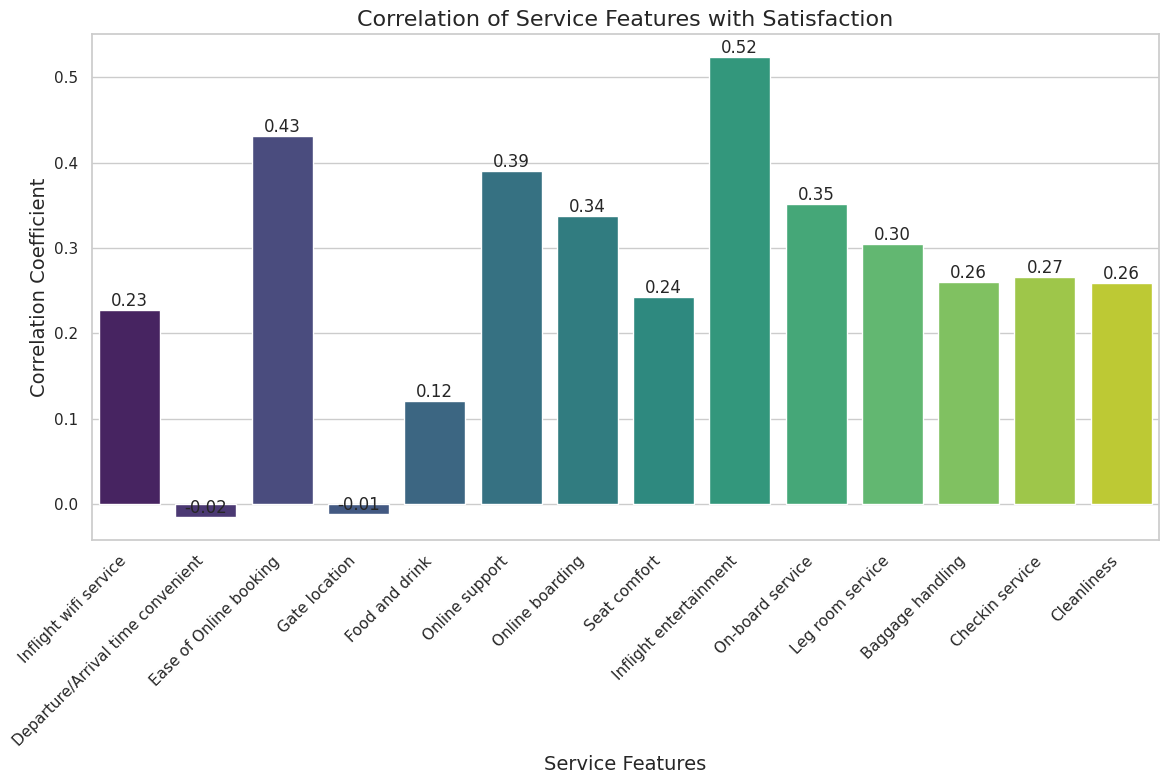

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot to visualize the correlations
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=service_feat, y=correlation_with_satisfaction, palette="viridis")

# Add title and labels
plt.title('Correlation of Service Features with Satisfaction', fontsize=16)
plt.xlabel('Service Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add correlation values on top of the bars
for index, value in enumerate(correlation_with_satisfaction):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Tight layout to ensure labels fit
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
corr_matrix

satisfaction  Customer Type       Age  \
satisfaction                           1.000000      -0.292592  0.117971   
Customer Type                         -0.292592       1.000000 -0.284172   
Age                                    0.117971      -0.284172  1.000000   
Type of Travel                        -0.109239      -0.308236 -0.044808   
Class                                 -0.278932       0.042994 -0.116921   
Flight Distance                       -0.039224       0.018938 -0.249625   
Seat comfort                           0.242384      -0.042845  0.008784   
Departure/Arrival time convenient     -0.015507      -0.186053  0.039055   
Food and drink                         0.120677      -0.048725  0.015749   
Gate location                         -0.012071      -0.000522 -0.000547   
Inflight wifi service                  0.227062      -0.073400  0.013965   
Inflight entertainment                 0.523496      -0.235757  0.130511   
Online support                         0.390143      -0.186154  0.121201   
Ease of Online booking                 0.431772      -0.149664  0.071594   
On-board service                       0.352047      -0.085433  0.066704   
Leg room service                       0.304928      -0.097179  0.083762   
Baggage handling                       0.260347      -0.000639 -0.015452   
Checkin service                        0.266179      -0.044353  0.031845   
Cleanliness                            0.259330      -0.002333 -0.018271   
Online boarding                        0.338147      -0.106394  0.037973   
Departure Delay in Minutes            -0.073909       0.003859 -0.009041   
Arrival Delay in Minutes              -0.080487       0.004769 -0.011206   
Delayed                                0.067030      -0.002022  0.010591   

                                   Type of Travel     Class  Flight Distance  \
satisfaction                            -0.109239 -0.278932        -0.039224   
Customer Type                           -0.308236  0.042994         0.018938   
Age                                     -0.044808 -0.116921        -0.249625   
Type of Travel                           1.000000  0.486718        -0.122762   
Class                                    0.486718  1.000000        -0.154065   
Flight Distance                         -0.122762 -0.154065         1.000000   
Seat comfort                             0.016839  0.035022        -0.042409   
Departure/Arrival time convenient        0.191525  0.054518         0.001350   
Food and drink                          -0.031751 -0.042236        -0.004649   
Gate location                           -0.013801  0.002806        -0.002409   
Inflight wifi service                   -0.019321 -0.056670         0.012230   
Inflight entertainment                  -0.079576 -0.224242        -0.027542   
Online support                          -0.039385 -0.168457        -0.032022   
Ease of Online booking                  -0.025790 -0.121663        -0.022299   
On-board service                         0.035899 -0.165430        -0.032559   
Leg room service                         0.013896 -0.125318        -0.030316   
Baggage handling                         0.048421 -0.129086         0.019768   
Checkin service                          0.057253 -0.138172         0.002456   
Cleanliness                              0.058405 -0.122513         0.009432   
Online boarding                         -0.009368 -0.093906         0.009604   
Departure Delay in Minutes              -0.005913  0.009530         0.112555   
Arrival Delay in Minutes                -0.005972  0.014037         0.109733   
Delayed                                  0.004291 -0.005115        -0.043262   

                                   Seat comfort  \
satisfaction                           0.242384   
Customer Type                         -0.042845   
Age                                    0.008784   
Type of Travel                         0.016839   
Class                             

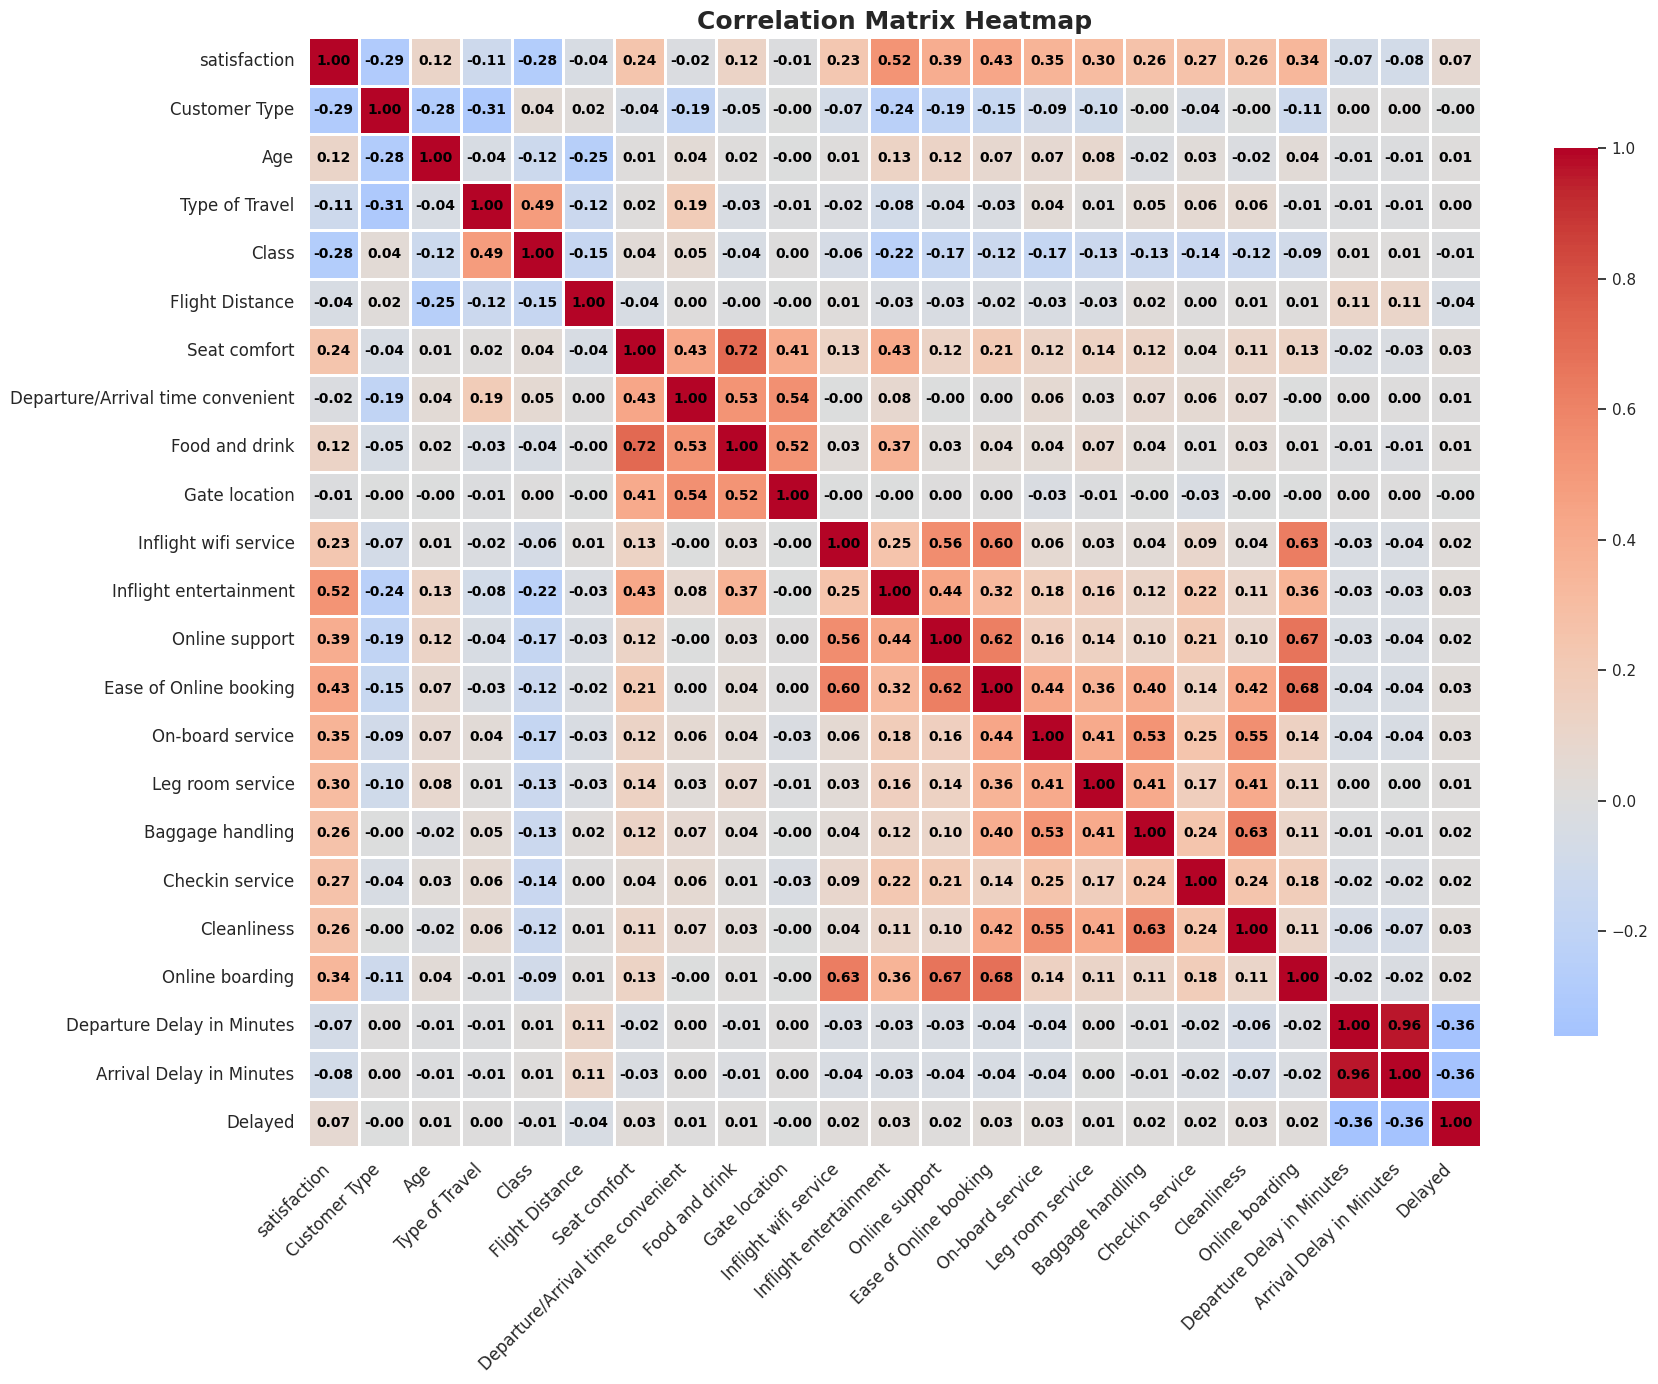

In [ ]:
# Create a heatmap to visualize the correlation matrix
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=1,
    linecolor='white',
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

# Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold')
#plt.xlabel('Features', fontsize=14, weight='bold')
#plt.ylabel('Features', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Sort the correlation coefficients in descending order
sorted_correlation = correlation_with_satisfaction.sort_values(ascending=False) # Sort in descending order

# Print the top 5 most positively correlated service features
print("Top 5 most positively correlated service features:")
print(sorted_correlation.head(5))

Top 5 most positively correlated service features:
Inflight entertainment    0.523496
Ease of Online booking    0.431772
Online support            0.390143
On-board service          0.352047
Online boarding           0.338147
Name: satisfaction, dtype: float64


In [ ]:
# Print the top 5 most negatively correlated service features
print("Top 5 most negatively correlated service features:")
sorted_correlation.tail(5)

Top 5 most negatively correlated service features:


Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Gate location                       -0.012071
Departure/Arrival time convenient   -0.015507
Name: satisfaction, dtype: float64

In [ ]:
sorted_correlation

Inflight entertainment               0.523496
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Online boarding                      0.338147
Leg room service                     0.304928
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Gate location                       -0.012071
Departure/Arrival time convenient   -0.015507
Name: satisfaction, dtype: float64

## MODELLING

### Importing necessary libraries

In [ ]:
# Importing classification algorithms from scikit-learn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline # Import Pipeline

# Importing XGBoost classifier
from xgboost import XGBClassifier

# Importing evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, ConfusionMatrixDisplay, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler # For feature scaling
from scipy.stats import uniform, randint

In [ ]:
# splitting the data into x and y
X = df.drop('satisfaction', axis=1)
y = df['satisfaction'] # Target variable

In [ ]:
X

Customer Type  Age  Type of Travel  Class  Flight Distance  \
0                   0   65               1      1              265   
1                   0   47               1      0             2464   
2                   0   15               1      1             2138   
3                   0   60               1      1              623   
4                   0   70               1      1              354   
...               ...  ...             ...    ...              ...   
129875              1   29               1      1             1731   
129876              1   63               1      0             2087   
129877              1   69               1      1             2320   
129878              1   66               1      1             2450   
129879              1   38               1      1             4307   

        Seat comfort  Departure/Arrival time convenient  Food and drink  \
0                  0                                  0               0   
1                  0                                  0               0   
2                  0                                  0               0   
3                  0                                  0               0   
4                  0                                  0               0   
...              ...                                ...             ...   
129875             5                                  5               5   
129876             2                                  3               2   
129877             3                                  0               3   
129878             3                                  2               3   
129879             3                                  4               3   

        Gate location  Inflight wifi service  ...  Ease of Online booking  \
0                   2                      2  ...                       3   
1                   3                      0  ...                       3   
2                   3                      2  ...                       2   
3                   3                      3  ...                       1   
4                   3                      4  ...                       2   
...               ...                    ...  ...                     ...   
129875              3                      2  ...                       2   
129876              4                      2  ...                       3   
129877              3                      3  ...                       4   
129878              2                      3  ...                       3   
129879              3                      3  ...                       4   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      3                 0                 3                5   
1                      4                 4                 4                2   
2                      3                 3                 4                4   
3                      1                 0                 1                4   
4                      2                 0                 2                4   
...                  ...               ...               ...              ...   
129875                 3                 3                 4                4   
129876                 2                 3                 3                1   
129877                 4                 3                 4                2   
129878                 3                 2                 3                2   
129879                 5                 5                 5                3   

        Cleanliness  Online boarding  Departure Delay in Minutes  \
0                 3                2                           0   
1                 3                2                         310   
2                 4                2                           0   
3                 1                3                           0   
4                 2         

In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [ ]:
X.shape, y.shape

((129880, 22), (129880,))

In [ ]:
# splitting data into train and test set

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# putting models in a dictionary
models = {"Decision Tree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(),
          "Gradient Boost": GradientBoostingClassifier(),
          "AdaBoost": AdaBoostClassifier()}

# setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models
    X_train: training data (no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    #setting up a random seed
    np.random.seed(42)

    # making a dictionary to keep model scores
    model_scores = {}

    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(X_train, y_train)
        # evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
scores

{'Decision Tree': 0.9360563597166616,
 'KNN': 0.7041884816753927,
 'Random Forest': 0.9561133353865107,
 'XGBoost': 0.958192177394518,
 'Gradient Boost': 0.9205420388050508,
 'AdaBoost': 0.8965968586387435}

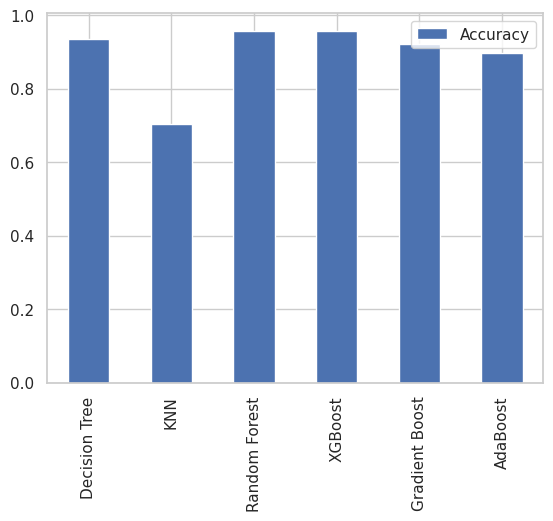

In [ ]:
model_compare = pd.DataFrame(scores, index=['Accuracy'])
model_compare.T.plot.bar();# T means transpose, so as to improve the plot

XGboost model appears to perform better. let's evaluate the models individually

### GRADIENT BOOSTING MODEL

In [ ]:
# Create a GradientBoostingClassifier instance
gbc = GradientBoostingClassifier(learning_rate = 0.16743239807751675, max_depth = 9, n_estimators = 219)

# Train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.16743239807751675, max_depth=9,
                           n_estimators=219)

In [ ]:
# Make predictions
y_pred_g = gbc.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_g = accuracy_score(y_test, y_pred_g)
print(f'Accuracy: {accuracy_g:.4f}')
print(f'Precision: {precision_score(y_test, y_pred_g):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_g):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_g):.2f}')
print('')
print('Gradient boosting Model Classification Report:')
print(classification_report(y_test, y_pred_g))

Accuracy: 0.9605
Precision: 0.97
Recall: 0.96
F1 Score: 0.96

Gradient boosting Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11675
           1       0.97      0.96      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
# Confusion Matrix
conf_matrix_g = confusion_matrix(y_test, y_pred_g)
print('Confusion Matrix:')
conf_matrix_g

Confusion Matrix:


array([[11265,   410],
       [  616, 13685]])

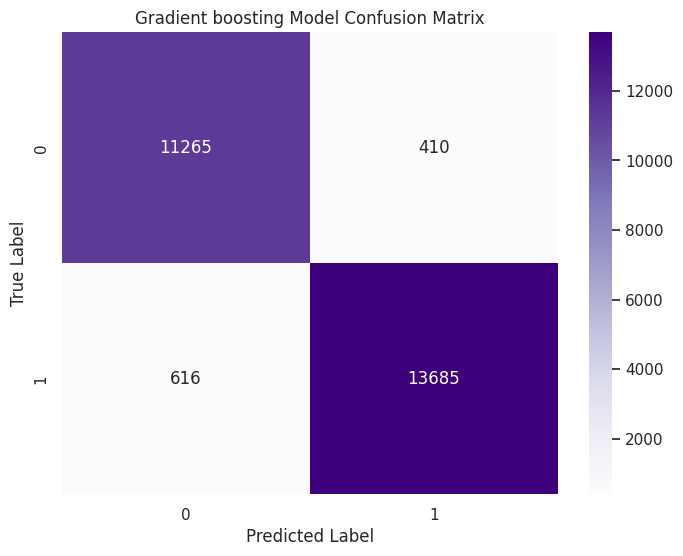

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_g, annot=True, fmt='d', cmap='Purples')
plt.title('Gradient boosting Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy is  96
F1 score is  96
Precision is  96
Recall is  97
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     11265               616
Actual negative       410             13685



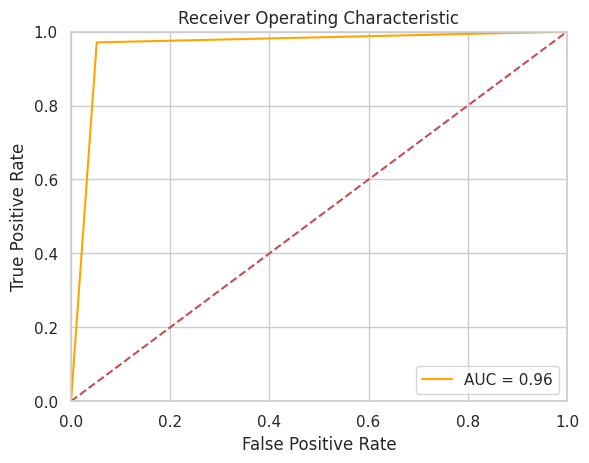

In [ ]:
ds.model.get_classification_report(y_pred_g, y_test)

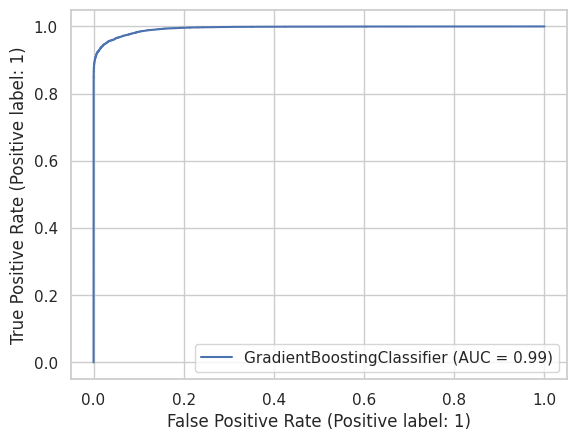

In [ ]:
# plotting the ROC curve and calculating the AUC
RocCurveDisplay.from_estimator(gbc, X_test, y_test);

In [ ]:
y_pred_proba_g = gbc.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_proba_g

array([9.99038654e-01, 1.34505117e-05, 9.99996189e-01, ...,
       9.99145659e-01, 8.86505501e-01, 9.99998922e-01])

In [ ]:
auc_g = roc_auc_score(y_test, y_pred_proba_g)
print(f'AUC: {auc_g:.2f}')

AUC: 0.99


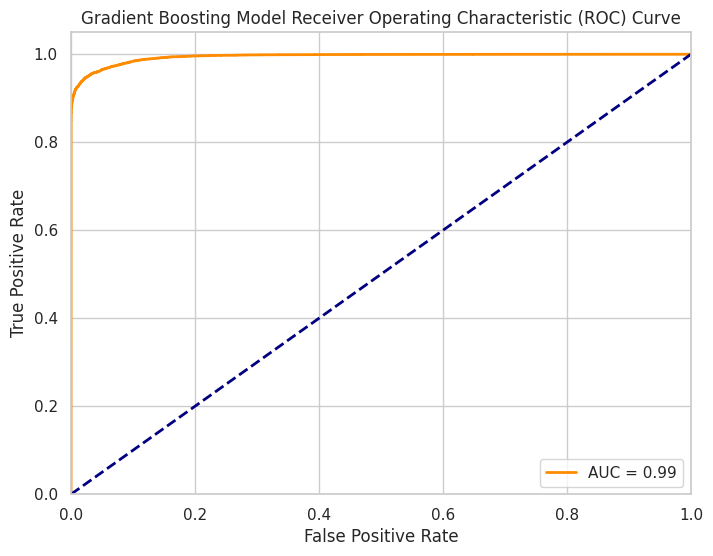

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_g)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_g:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### XGBOOST MODEL

In [ ]:
# Create an XGBClassifier instance
xgb = XGBClassifier( colsample_bytree = 0.9140703845572055, learning_rate = 0.06990213464750791,
                    max_depth = 9, n_estimators = 113, subsample = 0.786705157299192,
                     use_label_encoder=False, eval_metric='logloss', random_state=45)

In [ ]:
# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9140703845572055, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06990213464750791,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=113, n_jobs=None,
              num_parallel_tree=None, random_state=45, ...)

In [ ]:
# Make predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [ ]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_score(y_test, y_pred_xgb):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_xgb):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_xgb):.2f}')
print('')
print('XGBoost Model Classification Report:')
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.9584
Precision: 0.97
Recall: 0.95
F1 Score: 0.96

XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
conf_matrix_xgb

Confusion Matrix:


array([[11279,   396],
       [  684, 13617]])

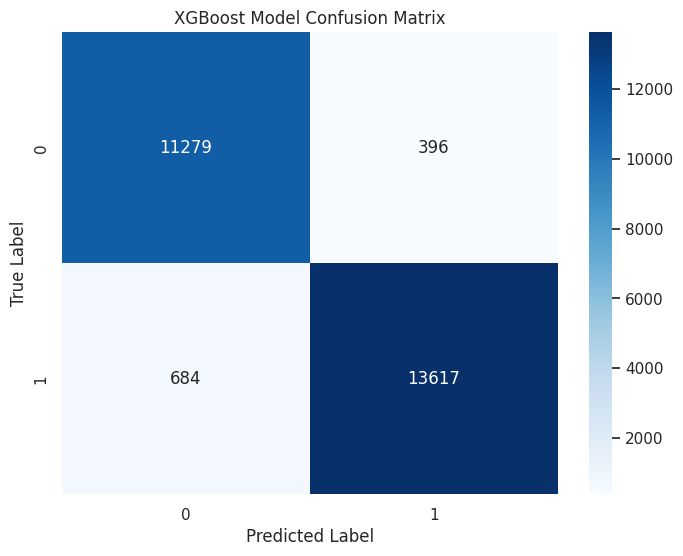

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate AUC
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'AUC: {auc_xgb:.2f}')

AUC: 0.99


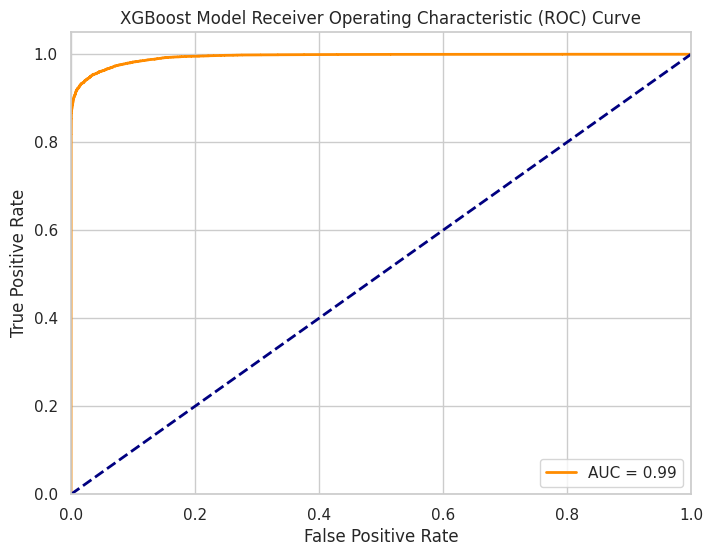

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_xgb:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

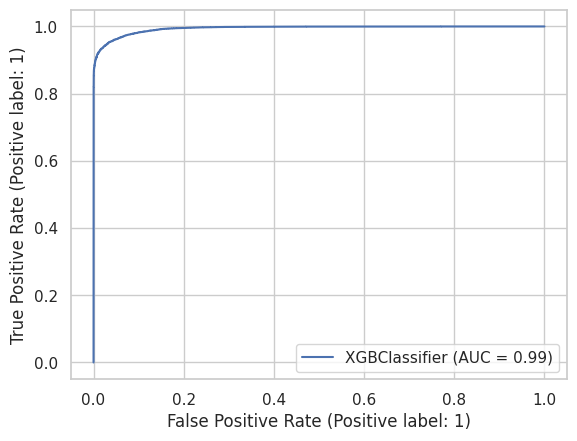

In [ ]:
# plotting the ROC curve and calculating the AUC
RocCurveDisplay.from_estimator(xgb, X_test, y_test);

Accuracy is  96
F1 score is  96
Precision is  95
Recall is  97
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     11279               684
Actual negative       396             13617



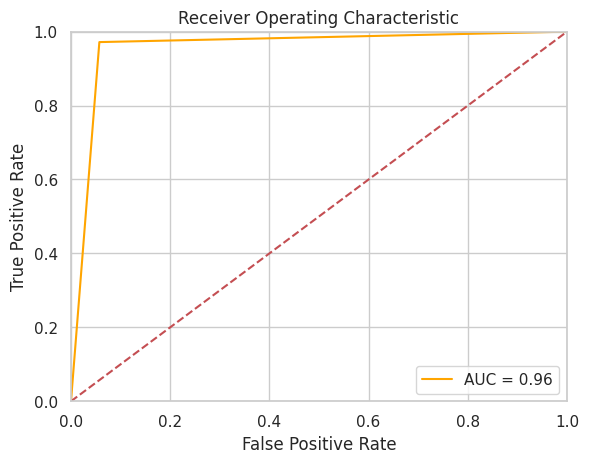

In [ ]:
ds.model.get_classification_report(y_pred_xgb, y_test)

### ADABOOST CLASSIFIER

In [ ]:
# Create an AdaBoostClassifier instance
# Using random forest as the base estimator
base_estimator = RandomForestClassifier()
adb = AdaBoostClassifier(estimator = base_estimator, random_state=0)

In [ ]:
# Train the model
adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=0)

In [ ]:
# Make predictions
y_pred_adb = adb.predict(X_test)
y_pred_proba_adb = adb.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [ ]:
# Evaluate the model
accuracy_adb = accuracy_score(y_test, y_pred_adb)
print(f'Accuracy: {accuracy_adb:.4f}')
print(f'Precision: {precision_score(y_test, y_pred_adb):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_adb):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_adb):.2f}')
print('')
print('AdaBoost Model Classification Report:')
print(classification_report(y_test, y_pred_adb))

Accuracy: 0.9568
Precision: 0.97
Recall: 0.95
F1 Score: 0.96

AdaBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
# Confusion Matrix
conf_matrix_adb = confusion_matrix(y_test, y_pred_adb)
print('Confusion Matrix:')
conf_matrix_adb

Confusion Matrix:


array([[11244,   431],
       [  690, 13611]])

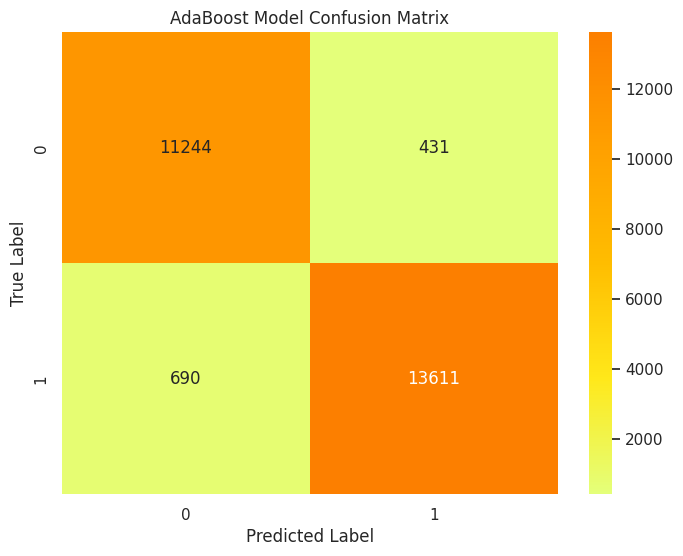

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adb, annot=True, fmt='d', cmap='Wistia')
plt.title('AdaBoost Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Calculate AUC
auc_adb = roc_auc_score(y_test, y_pred_proba_adb)
print(f'AUC: {auc_adb:.2f}')

AUC: 0.99


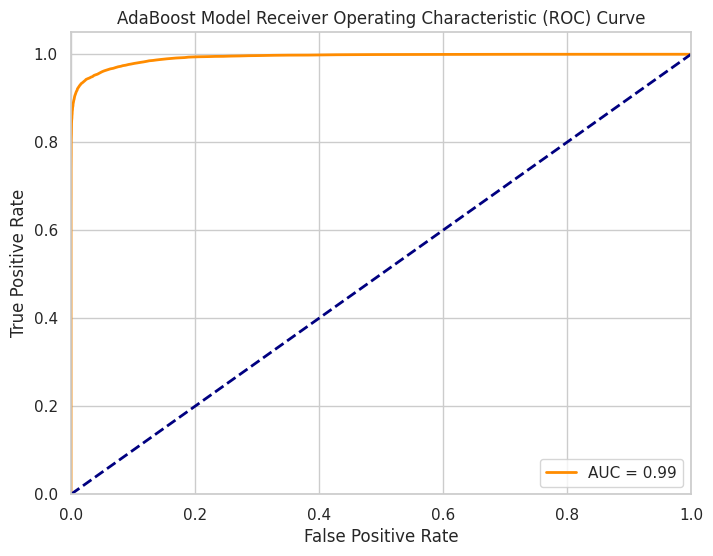

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_adb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_adb:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

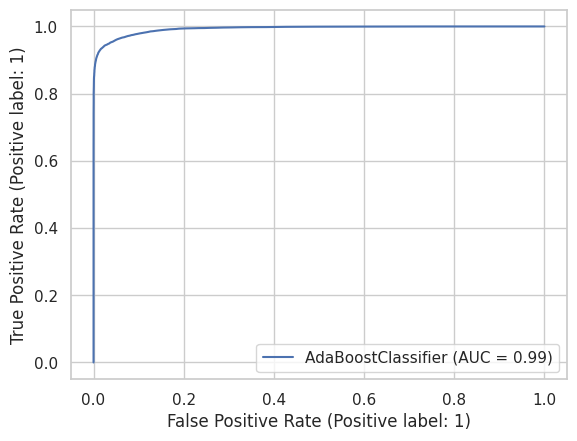

In [ ]:
# plotting the ROC curve and calculating the AUC
RocCurveDisplay.from_estimator(adb, X_test, y_test);

Accuracy is  96
F1 score is  96
Precision is  95
Recall is  97
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     11244               690
Actual negative       431             13611



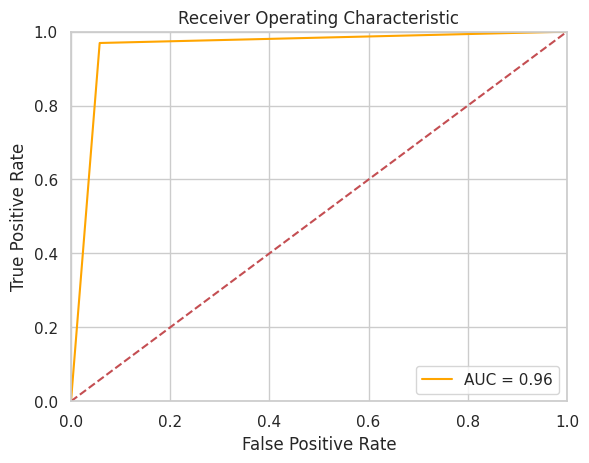

In [ ]:
ds.model.get_classification_report(y_pred_adb, y_test)

### DECISION TREE MODEL

In [ ]:
# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_dtc = dtc.predict(X_test)
y_pred_proba_dtc = dtc.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [ ]:
# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f'Accuracy: {accuracy_dtc:.4f}')
print(f'Precision: {precision_score(y_test, y_pred_dtc):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_dtc):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_dtc):.2f}')
print('')
print('Decision Tree Model Classification Report:')
print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.9361
Precision: 0.94
Recall: 0.94
F1 Score: 0.94

Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11675
           1       0.94      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [ ]:
# Confusion Matrix
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
print('Confusion Matrix:')
conf_matrix_dtc

Confusion Matrix:


array([[10824,   851],
       [  810, 13491]])

In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

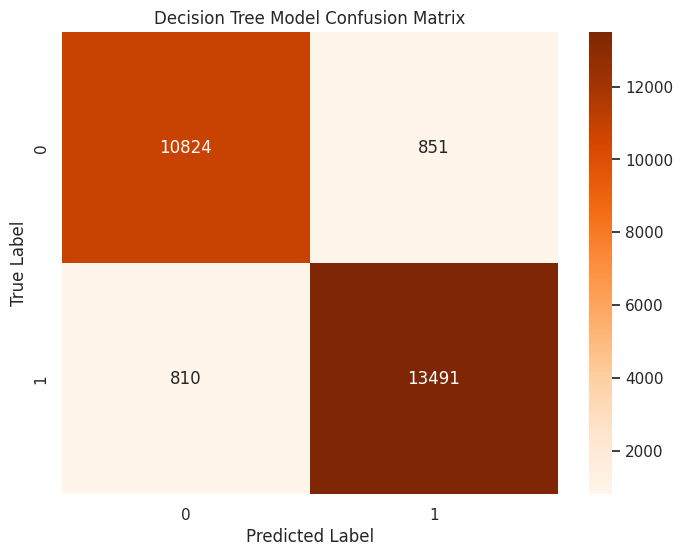

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

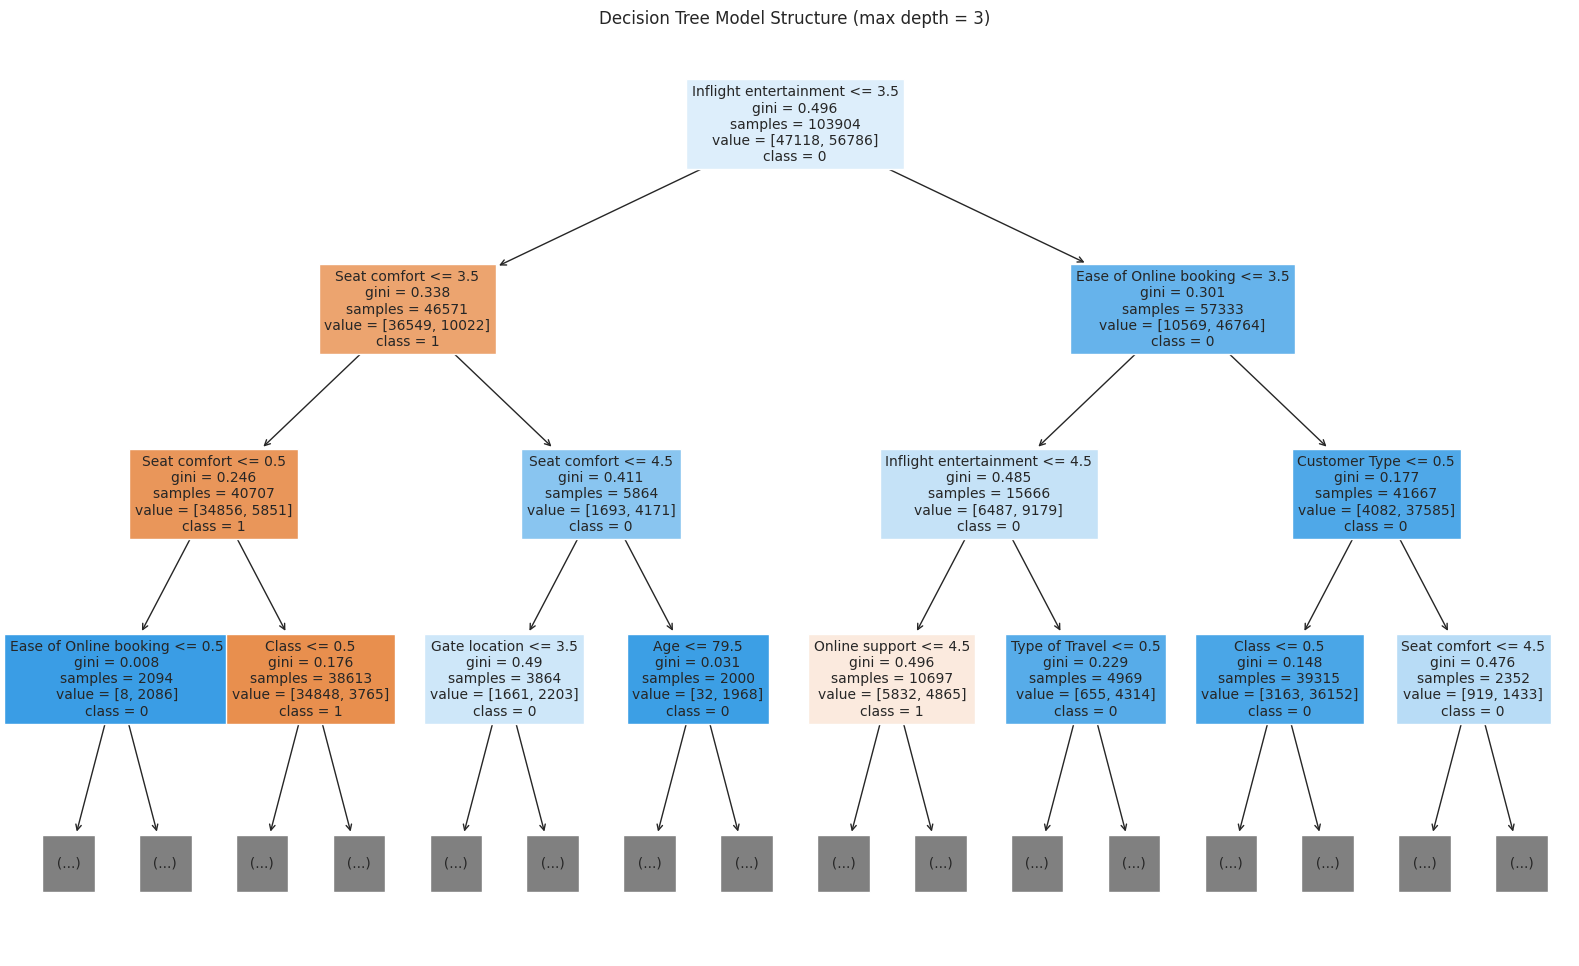

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
# Convert class names to strings explicitly
class_names_str = [str(name) for name in df.satisfaction.unique()]
plot_tree(dtc, max_depth=3, feature_names=X.columns, class_names=class_names_str, filled=True, fontsize=10)
plt.title('Decision Tree Model Structure (max depth = 3)')
plt.show()

In [ ]:
# Calculate AUC
auc_dtc = roc_auc_score(y_test, y_pred_proba_dtc)
print(f'AUC: {auc_dtc:.2f}')

AUC: 0.94


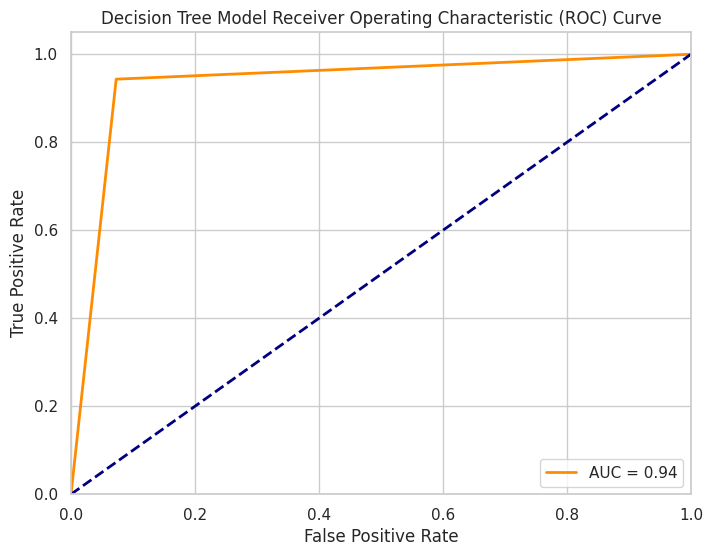

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dtc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_dtc:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

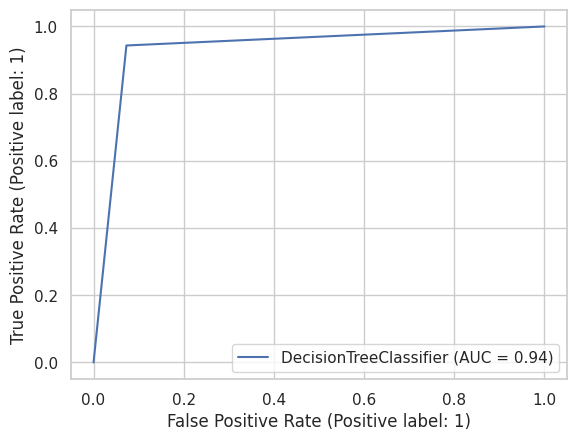

In [ ]:
# plotting the ROC curve and calculating the AUC
RocCurveDisplay.from_estimator(dtc, X_test, y_test);

Accuracy is  94
F1 score is  94
Precision is  94
Recall is  94
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     10824               810
Actual negative       851             13491



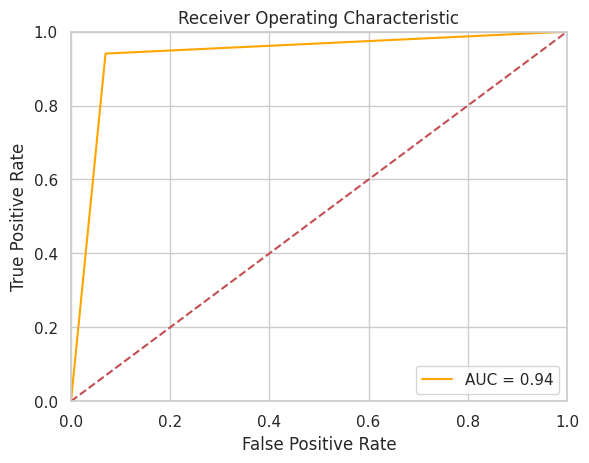

In [ ]:
ds.model.get_classification_report(y_pred_dtc, y_test)

### KNN MODEL

In [ ]:
# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=14)
# creating a pipeline to scale the data
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', knn)])
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=14))])

In [ ]:
# Make predictions
y_pred_knn = pipeline.predict(X_test)
y_pred_proba_knn = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_score(y_test, y_pred_knn):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_knn):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_knn):.2f}')
print('')
print('K-Nearest Neighbors Classification Report:')
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9172
Precision: 0.96
Recall: 0.89
F1 Score: 0.92

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11675
           1       0.96      0.89      0.92     14301

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [ ]:
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
conf_matrix_knn

Confusion Matrix:


array([[11128,   547],
       [ 1604, 12697]])

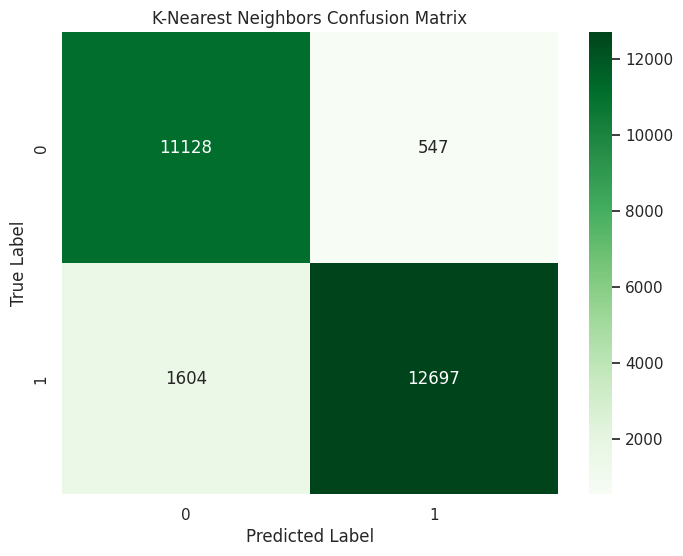

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC: 0.98


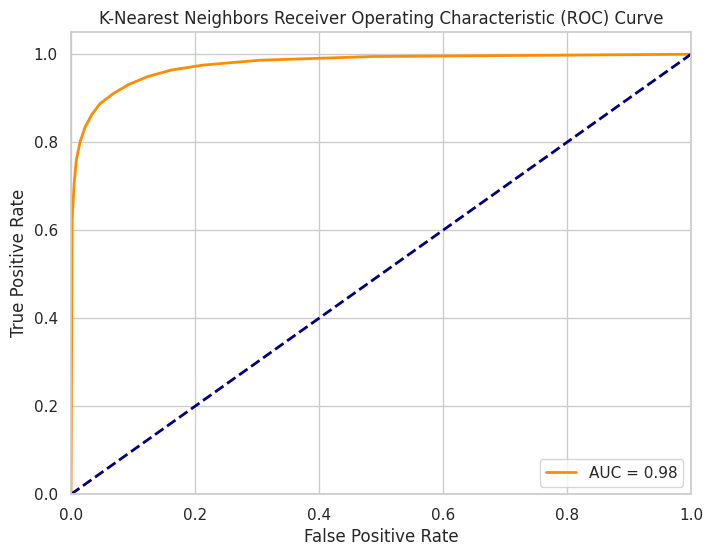

In [ ]:
# Calculate AUC
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f'AUC: {auc_knn:.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_knn:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

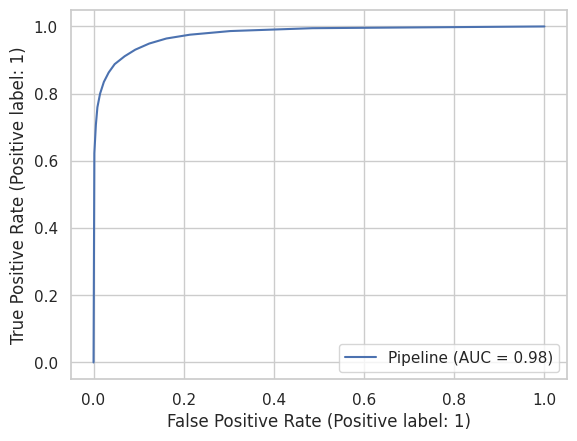

In [ ]:
# plotting the ROC curve and calculating the AUC
RocCurveDisplay.from_estimator(pipeline, X_test, y_test);

Accuracy is  92
F1 score is  92
Precision is  89
Recall is  96
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     11128              1604
Actual negative       547             12697



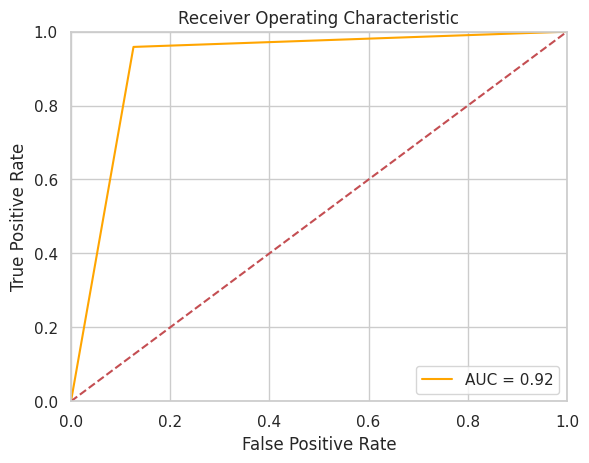

In [ ]:
ds.model.get_classification_report(y_pred_knn, y_test)

### RANDOM FOREST MODEL

In [ ]:
# Create a KNeighborsClassifier instance
rf = RandomForestClassifier(random_state=2)
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_rf):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf):.2f}')
print('')
print('Random Forest Model Classification Report:')
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9565
Precision: 0.97
Recall: 0.95
F1 Score: 0.96

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
conf_matrix_rf

Confusion Matrix:


array([[11249,   426],
       [  705, 13596]])

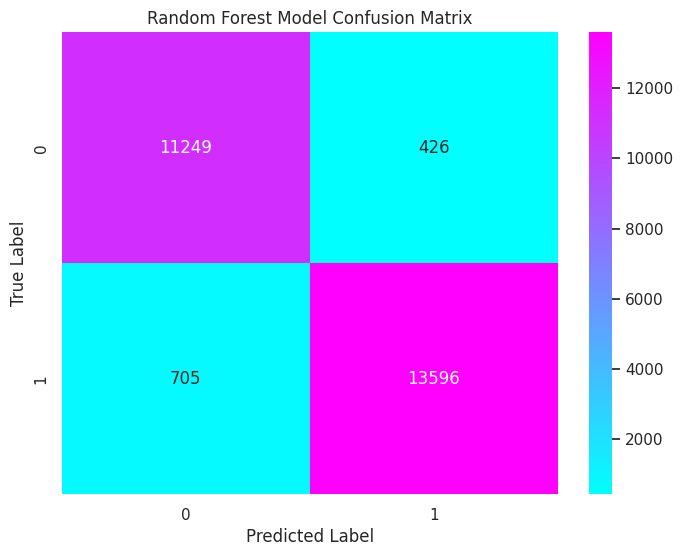

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='cool')
plt.title('Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC: 0.99


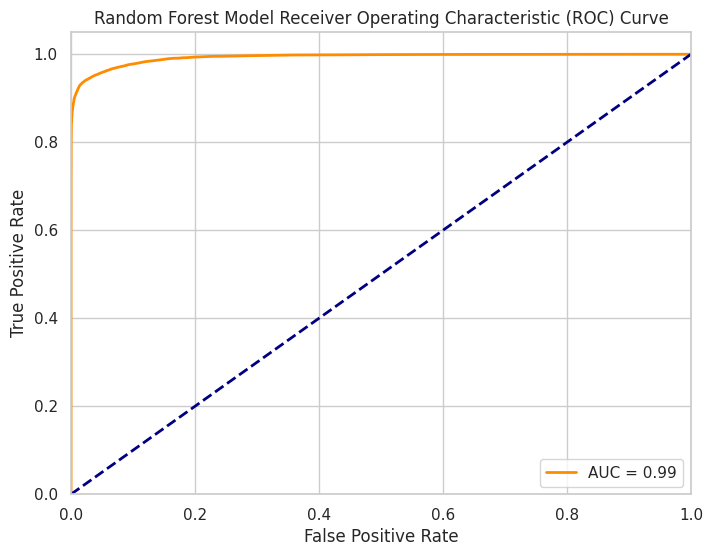

In [ ]:
# Calculate AUC
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'AUC: {auc_rf:.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_rf:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

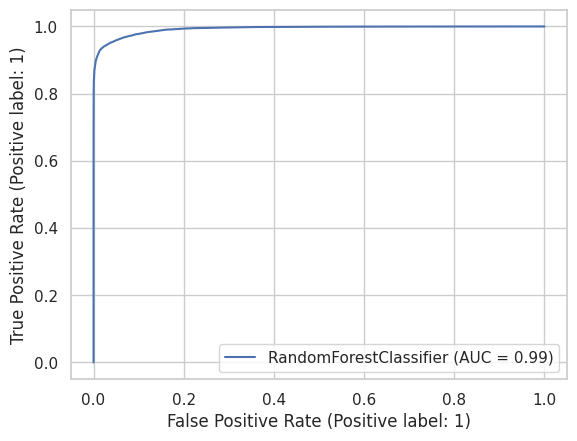

In [ ]:
# plotting the ROC curve and calculating the AUC
RocCurveDisplay.from_estimator(rf, X_test, y_test);

Accuracy is  96
F1 score is  96
Precision is  95
Recall is  97
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     11249               705
Actual negative       426             13596



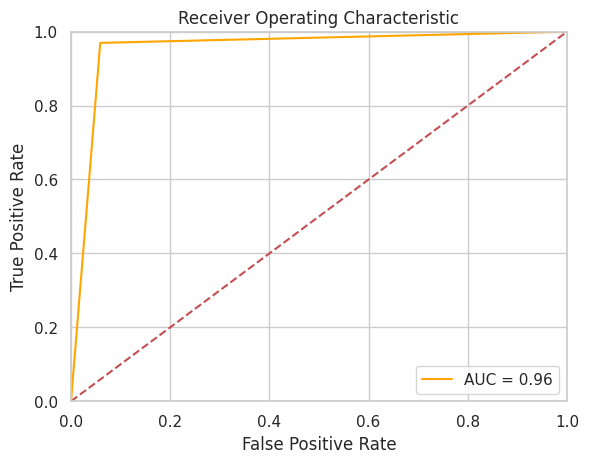

In [ ]:
ds.model.get_classification_report(y_pred_rf, y_test)

### Putting all the process in a pipeline and creating a function to avoid coding redundancy

Gradient Boosting Accuracy: 0.9598
Gradient Boosting Precision: 0.97
Gradient Boosting Recall: 0.96
Gradient Boosting F1 Score: 0.96

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11675
           1       0.97      0.96      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



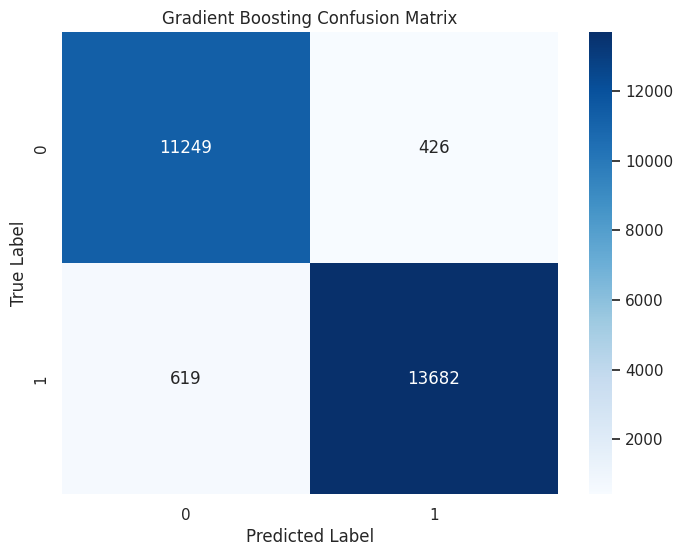

Gradient Boosting AUC: 0.99


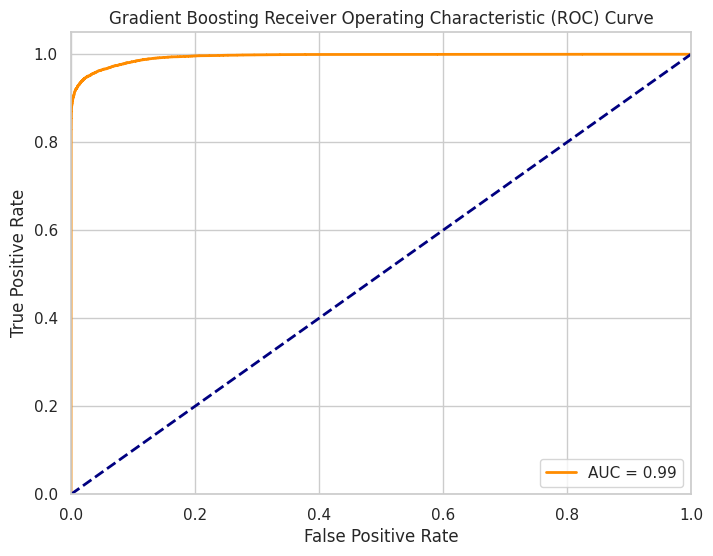

Random Forest Accuracy: 0.9560
Random Forest Precision: 0.97
Random Forest Recall: 0.95
Random Forest F1 Score: 0.96

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



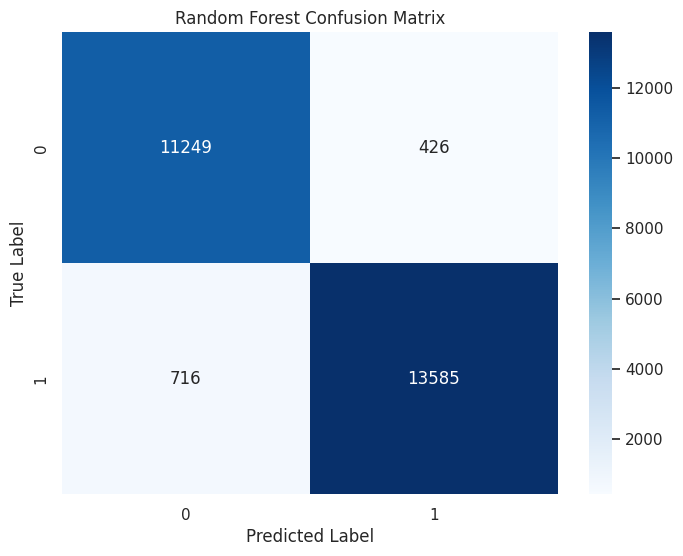

Random Forest AUC: 0.99


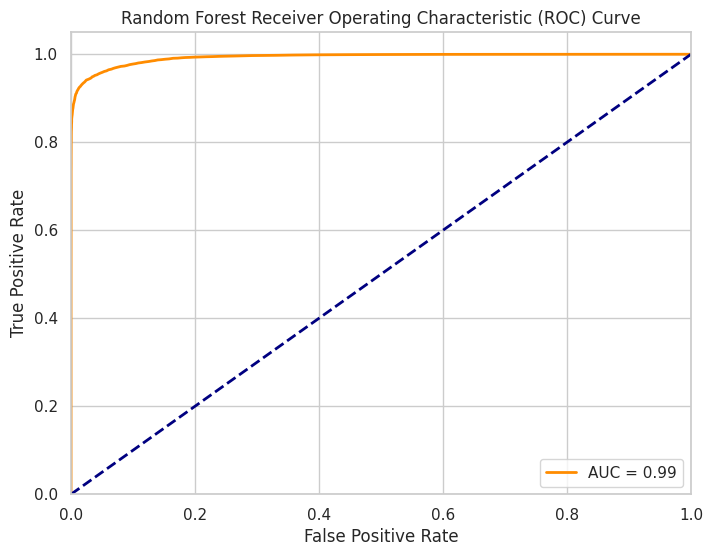

XGBoost Accuracy: 0.9584
XGBoost Precision: 0.97
XGBoost Recall: 0.95
XGBoost F1 Score: 0.96

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



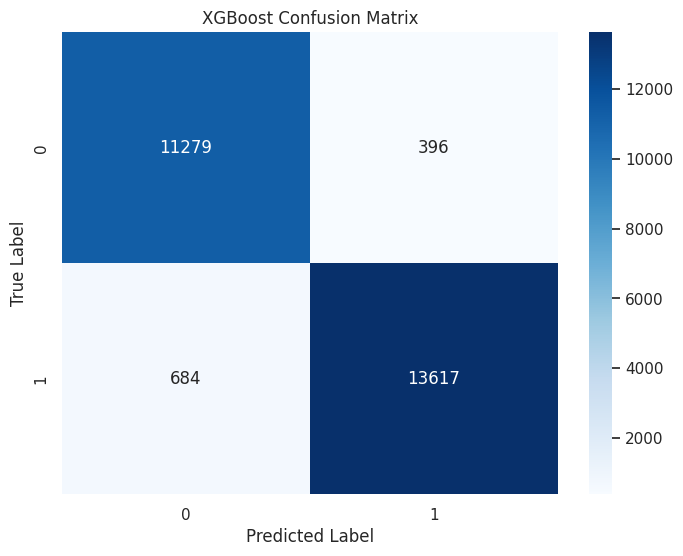

XGBoost AUC: 0.99


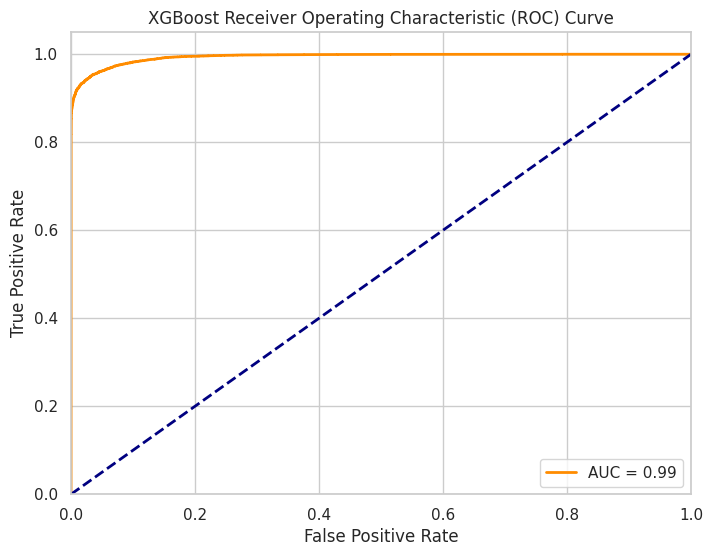

AdaBoost Accuracy: 0.9569
AdaBoost Precision: 0.97
AdaBoost Recall: 0.95
AdaBoost F1 Score: 0.96

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



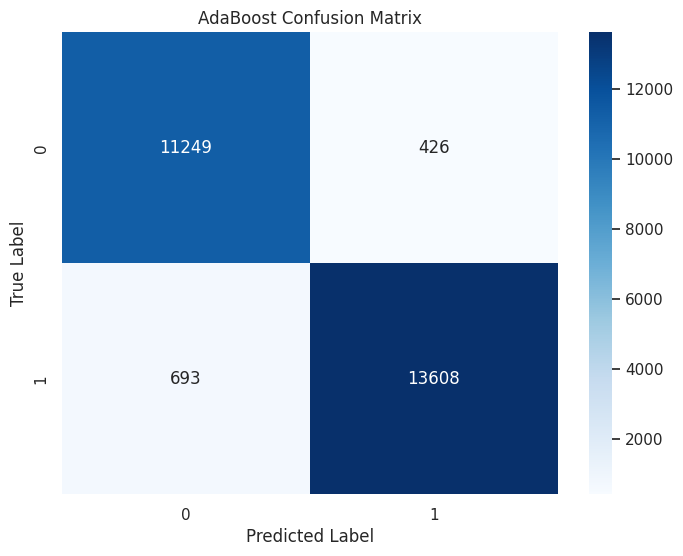

AdaBoost AUC: 0.99


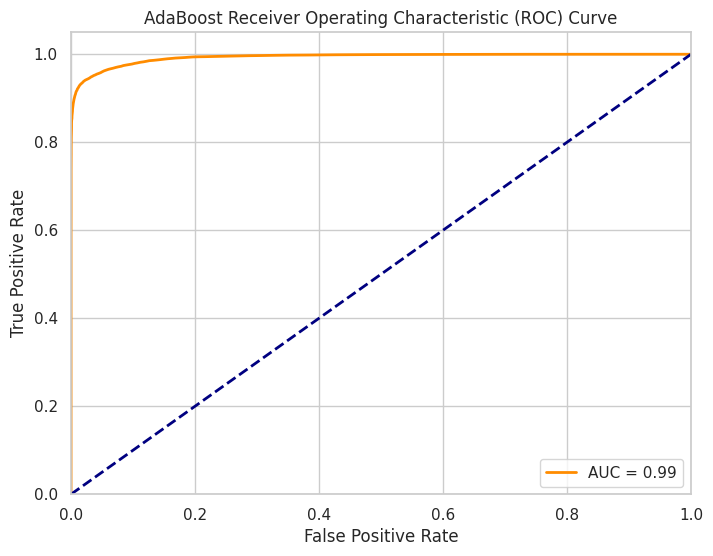

K-Nearest Neighbors Accuracy: 0.9172
K-Nearest Neighbors Precision: 0.96
K-Nearest Neighbors Recall: 0.89
K-Nearest Neighbors F1 Score: 0.92

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11675
           1       0.96      0.89      0.92     14301

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



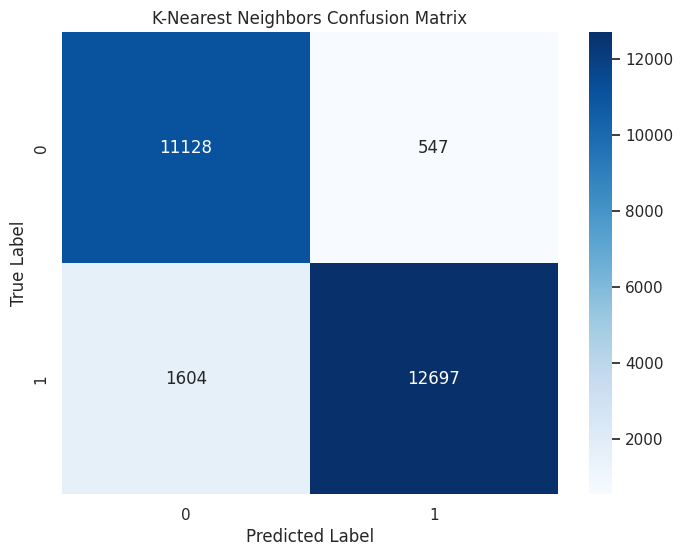

K-Nearest Neighbors AUC: 0.98


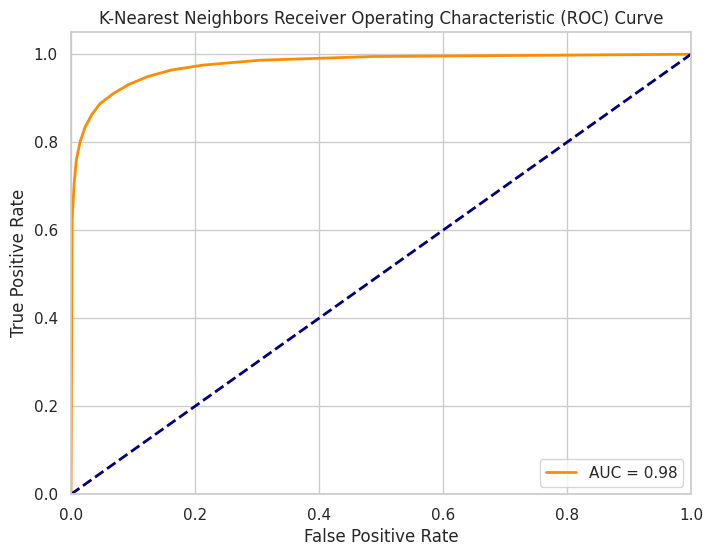

Decision Tree Accuracy: 0.9361
Decision Tree Precision: 0.94
Decision Tree Recall: 0.94
Decision Tree F1 Score: 0.94

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11675
           1       0.94      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



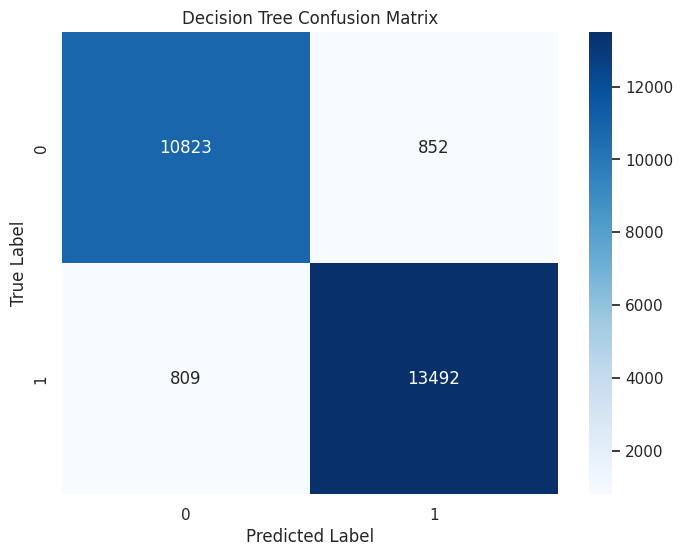

Decision Tree AUC: 0.94


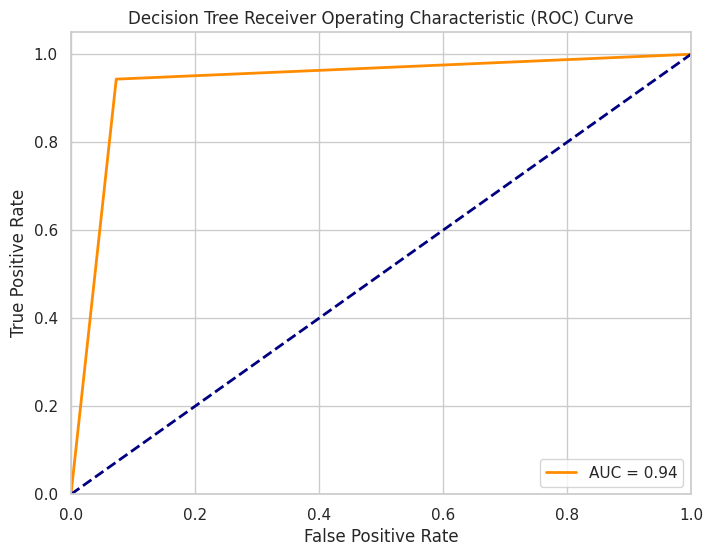

In [ ]:
# Function to build, evaluate, and plot results for a given classifier
def evaluate_classifier(clf, X_train, X_test, y_train, y_test, classifier_name):
    """

    Args:
      clf:
      X_train:
      X_test:
      y_train:
      y_test:
      classifier_name:
    """
    # Create a pipeline with standard scaler and classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1Score = f1_score(y_test, y_pred)
    print(f'{classifier_name} Accuracy: {accuracy:.4f}')
    print(f'{classifier_name} Precision: {precision:.2f}')
    print(f'{classifier_name} Recall: {recall:.2f}')
    print(f'{classifier_name} F1 Score: {f1Score:.2f}')
    print('')
    print(f'{classifier_name} Classification Report:')
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{classifier_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f'{classifier_name} AUC: {auc:.2f}')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# List of classifiers to evaluate
classifiers = [
    (GradientBoostingClassifier(learning_rate = 0.16743239807751675, max_depth = 9, n_estimators = 219), 'Gradient Boosting'),
    (RandomForestClassifier(random_state=42), 'Random Forest'),
    (XGBClassifier(colsample_bytree = 0.9140703845572055, learning_rate = 0.06990213464750791,
                    max_depth = 9, n_estimators = 113, subsample = 0.786705157299192,
                     use_label_encoder=False, eval_metric='logloss', random_state=45), 'XGBoost'),
    (AdaBoostClassifier(estimator=RandomForestClassifier(), learning_rate=0.1, random_state=0), 'AdaBoost'),
    (KNeighborsClassifier(n_neighbors=14), 'K-Nearest Neighbors'),
    (DecisionTreeClassifier(random_state=42), 'Decision Tree')
]

# Evaluate each classifier
for clf, name in classifiers:
    evaluate_classifier(clf, X_train, X_test, y_train, y_test, name)


### FEATURE IMPORTANCE

In [ ]:
# Extract feature importances
feature_importances = gbc.feature_importances_
feature_importances

array([0.04216135, 0.01729955, 0.02320979, 0.02354716, 0.02249468,
       0.19611546, 0.02261256, 0.01636589, 0.02174372, 0.00682189,
       0.41723941, 0.01878698, 0.06709671, 0.01221871, 0.01601313,
       0.0164537 , 0.01693763, 0.01692904, 0.01259267, 0.00479471,
       0.00794902, 0.00061623])

In [ ]:
feature_dict = dict(zip(X.columns, list(feature_importances)))
feature_dict

{'Customer Type': 0.04216134964472327,
 'Age': 0.017299545394127078,
 'Type of Travel': 0.023209794621759736,
 'Class': 0.023547164703203127,
 'Flight Distance': 0.022494679492707566,
 'Seat comfort': 0.19611545810037107,
 'Departure/Arrival time convenient': 0.02261256432060829,
 'Food and drink': 0.016365888724099723,
 'Gate location': 0.02174371904817823,
 'Inflight wifi service': 0.0068218942267759845,
 'Inflight entertainment': 0.417239409308557,
 'Online support': 0.018786979626113958,
 'Ease of Online booking': 0.06709670750870887,
 'On-board service': 0.012218705794607161,
 'Leg room service': 0.016013133362182352,
 'Baggage handling': 0.016453704627051244,
 'Checkin service': 0.016937632308738158,
 'Cleanliness': 0.016929041340933218,
 'Online boarding': 0.012592672532761088,
 'Departure Delay in Minutes': 0.004794714073913389,
 'Arrival Delay in Minutes': 0.007949015753071,
 'Delayed': 0.0006162254868083838}

In [ ]:
# Create a DataFrame for feature importances
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

Customer Type     Age  Type of Travel     Class  Flight Distance  \
0       0.042161  0.0173         0.02321  0.023547         0.022495   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0      0.196115                           0.022613        0.016366   

   Gate location  Inflight wifi service  ...  Ease of Online booking  \
0       0.021744               0.006822  ...                0.067097   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0          0.012219          0.016013          0.016454         0.016938   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0     0.016929         0.012593                    0.004795   

   Arrival Delay in Minutes   Delayed  
0                  0.007949  0.000616  

[1 rows x 22 columns]

In [ ]:
# Transpose the DataFrame for plotting
feature_df_t = feature_df.T
feature_df_t.columns = ['Feature Importance']

In [ ]:
# Sort the features by importance in descending order
feature_df_t_sorted = feature_df_t.sort_values('Feature Importance', ascending=False)

<ipython-input-180-d053b42529ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_df_t_sorted.index, x=feature_df_t_sorted['Feature Importance'], palette="YlGnBu_r", orient='h')


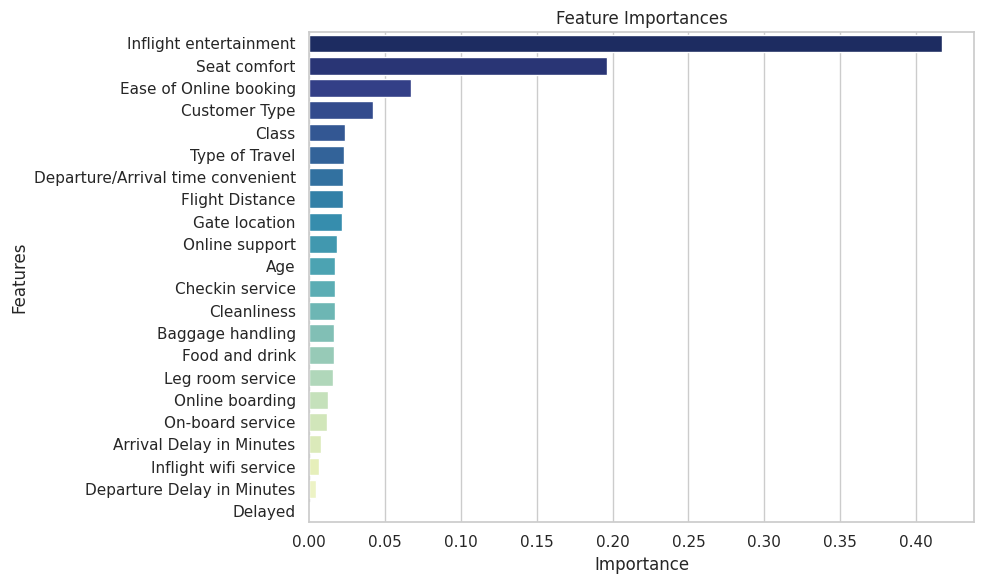

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(y=feature_df_t_sorted.index, x=feature_df_t_sorted['Feature Importance'], palette="YlGnBu_r", orient='h')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show();

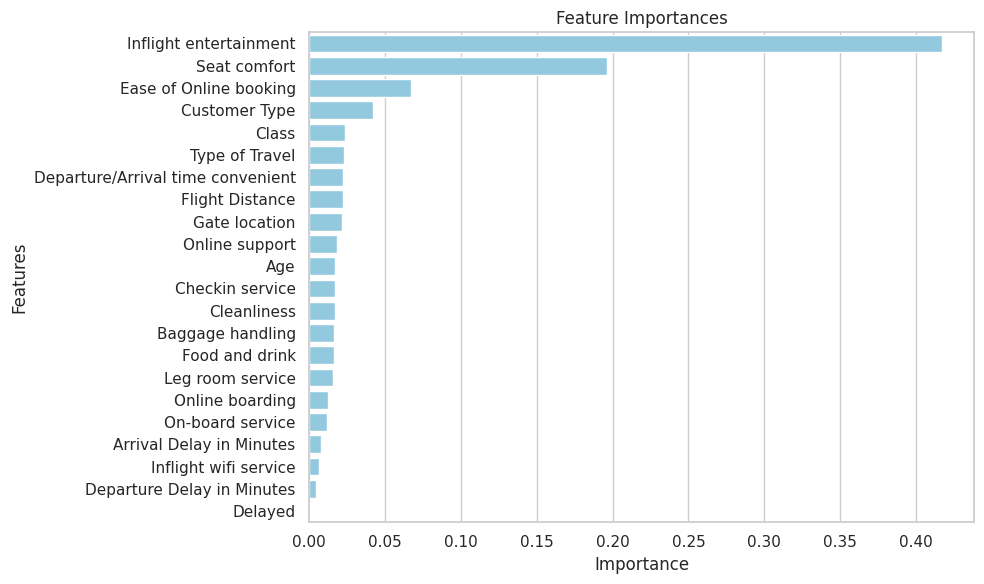

In [ ]:
import matplotlib.pyplot as plt
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(y=feature_df_t_sorted.index, x=feature_df_t_sorted['Feature Importance'], color='skyblue', orient='h') # Removed palette, used color instead
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Saving the best model (Gradient Boosting Model)

In [ ]:
#import os
#from joblib import dump, load

In [ ]:
# Specify the directory
#directory = '/content/drive/MyDrive/DIssertation'

In [ ]:
# File path
#file_path = os.path.join(directory, 'gradboost_model.joblib')

In [ ]:
#dump(gbc, file_path)

['/content/drive/MyDrive/DIssertation/gradboost_model.joblib']

In [ ]:
# Load the model from the file
#loaded_model = load('/content/drive/MyDrive/DIssertation/gradboost_model.joblib')

# Make predictions with the loaded model
#predictions = loaded_model.predict(X_test)

# Evaluate the model
#accuracy = accuracy_score(y_test, predictions)
#print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9605


In [ ]:
#import sklearn
#print(sklearn.__version__)


1.2.2


In [ ]:
#import numpy
#print(numpy.__version__)

1.25.2
